In [4]:
from komoran3py import KomoranPy

In [17]:
from nltk.tokenize import word_tokenize
import nltk
from wordcloud import WordCloud, STOPWORDS


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin' :#맥
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows' : 
    #폰트 차후 확인
    fontPath = 'c:/Windows/Fonts/malgun.ttf'
    fontName = font_manager.FontProperties(fname=fontPath).get_name()
    rc('font', family=fontName)
elif platform.system() == 'Linux' : 
    fontPath = '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'
    fontName = font_manager.FontProperties(fname=fontPath).get_name()
    rc('font', family=fontName)
#     fontPath =  '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',

else : print('알수없음')
import seaborn as sns

In [5]:
ko = KomoranPy()

In [6]:
text = open('../../data/chat_logs/2018-12-04_yapyap30-Copy1.log').readlines()

In [7]:
text

['# Log started: 2018-12-04 00:00:00 +0900\n',
 '[00:00:00] <다임구혁 (gurdyd9)> 앗 점검\n',
 '[00:00:00] <대독_ (ranker5486)> 점검?\n',
 '[00:00:00] <하임달 (css517)> 겁나 빠르네\n',
 '[00:00:01] <바간치 (oran1218)> 로스트아크입니다\n',
 '[00:00:03] <미국시민 (mundus77)> 누구나 다 계획은 있지\n',
 '[00:00:05] <rlaehd1002> 무기좀 보여주세요\n',
 '[00:00:07] <다임구혁 (gurdyd9)> 점검 가나연\n',
 '[00:00:08] <성농 (rlatjddnr401)> 회복무조건 사야댐\n',
 '[00:00:08] <형때문에트위치입갤 (yhl1224)> 방송키고 400찍으실거죠? ㅋㅋ 아니면 인정안함 ㄹㅇ;;\n',
 '[00:00:09] <디미트리 (ysh7687)> 점검 저거 나올때마다 불안해 죽것어\n',
 '[00:00:09] <ㄸㅏ개비 (ooppzzcc)> 벽에붙어서가면 망자해역 안거치고 돌아갈수잇어요 성태님\n',
 '[00:00:10] <뚫뛣띓 (v3241086)> 뭐없네\n',
 '[00:00:10] <Gudwn1414> 므ㅏ애\n',
 '[00:00:11] <재래기_ (ssangzzang)> 꽝\n',
 '[00:00:12] <웹툰주예수 (sahong7777)> 회복형배틀 저거사샘\n',
 '[00:00:12] <눈미 (kors153)> 닥불 ㅋㅋ\n',
 '[00:00:14] <salasauros> ㅁㄷㅂ\n',
 '[00:00:14] <존맛탱회전초밥 (jjsseea2)> 킹닥불은 사야지\n',
 '[00:00:15] <뚫뛣띓 (v3241086)> 포션\n',
 '[00:00:16] <마스카짱 (dbrtjdals)> 회복약 ㄱㄱ\n',
 '[00:00:18] <재래기_ (ssangzzang)> 선물상자 사쉴?\n',
 '[00:00:19] <%+한강각나옴 

In [8]:
import re
my = re.compile('\[([0-9:]*)\] <(\S*[ ]*\S*)> (\w.*)')
word_list = []
for line in text:
    mytext = my.search(line)
    if mytext :
        word_list.append(mytext.group(3))
word_list

['앗 점검',
 '점검?',
 '겁나 빠르네',
 '로스트아크입니다',
 '누구나 다 계획은 있지',
 '무기좀 보여주세요',
 '점검 가나연',
 '회복무조건 사야댐',
 '방송키고 400찍으실거죠? ㅋㅋ 아니면 인정안함 ㄹㅇ;;',
 '점검 저거 나올때마다 불안해 죽것어',
 '벽에붙어서가면 망자해역 안거치고 돌아갈수잇어요 성태님',
 '뭐없네',
 '므ㅏ애',
 '꽝',
 '회복형배틀 저거사샘',
 '닥불 ㅋㅋ',
 'ㅁㄷㅂ',
 '킹닥불은 사야지',
 '포션',
 '회복약 ㄱㄱ',
 '선물상자 사쉴?',
 'ㅇㅇ',
 '짱닥불',
 '회복형 사야지',
 '킹닥불',
 '저거 아마 아침에 점검하지아늘까',
 '왜혼없어',
 '포션도 이득아님??',
 '모닥불은 언제나 쓰니까',
 '요즘 잘뜨더니 이번꺼 별로네',
 '1234567',
 '여기레려~~',
 '포션이 개이득인데',
 '야부야부상 견갑이 나오리라는 생각을버리십시오',
 '포션사야지;ㅣ',
 '선물상자도사세여 나중에 개필요함',
 '룬 사야지',
 'ㄴㄴ',
 '다 사야지',
 '어차피 2티어가자나',
 '지갑전사니까 사자',
 '포션만사',
 '이제 2티어인데',
 '사지마',
 '얍얍이 380 넘었네 ㄷㄷ',
 '방송키고 400찍는거 아니면 인정안하는거 아시죠? ㅋㅋ;;',
 '2티어 금방인데 룬웨사',
 'ㅋㅋㅋㅋㅋㅋㅋㅋ',
 '포션만 사지 포션이 개쌉이득인데',
 '빻',
 '2티어 ㅇㅈ',
 '포션은?',
 '지갑전사',
 '빻빻빻',
 '포션은 골드대비 이득인데',
 '어디가?',
 '포션은 가성비 많이이득임',
 '7가호 쓰는데 포션이 왜 필요',
 'ㄹㅇ 개빡치는게 그때그때 초기화 하는거',
 '채팅 왜케 느려 머야',
 '망자 취-약',
 '망자 ㅅㄱ',
 '수칸님하고 이혼함?',
 '지도 켜',
 '취약ㅋㅋㅋ',
 '레이드 두피쓰나 써야해여?',
 '회복형 배틀아이템 상자 저게 모닥불 상위호완임',
 '대륙붙어서 가면 망자 안가도대',
 '이틀동안 숙제로 생활도 뜷어놓으면 4

In [70]:
tokens_ko = []
for wd in word_list : 
    for i in range(len(ko.pos(wd))) : 
        tokens_ko.append(ko.pos(wd)[i][0])


In [71]:
tokens_ko

['앗',
 '점검',
 '점검',
 '?',
 '겁나',
 '아',
 '빠르',
 '네',
 '로스트',
 '아크',
 '이',
 'ㅂ니다',
 '누구',
 '나',
 '다',
 '계획',
 '은',
 '있',
 '지',
 '무기',
 '좀',
 '보이',
 '어',
 '주',
 '시',
 '어요',
 '점검',
 '가',
 '나연',
 '회복',
 '무조건',
 '사',
 '아야',
 '대',
 'ㅁ',
 '방송',
 '하',
 '기',
 '이',
 '고',
 '400',
 '찍',
 '으시',
 'ㄹ',
 '거',
 '죠',
 '?',
 'ㅋㅋ',
 '아니',
 '면',
 '인정',
 '안함',
 'ㄹㅇ;;',
 '점검',
 '저것',
 '나오',
 'ㄹ',
 '때',
 '마다',
 '불안',
 '하',
 '아',
 '죽',
 '것',
 '어',
 '벽',
 '에',
 '붙',
 '어서',
 '가',
 '면',
 '망자',
 '해역',
 '안',
 '거치',
 '고',
 '돌아가',
 'ㄹ',
 '수',
 '잇',
 '어요',
 '성태',
 '님',
 '뭐',
 '없',
 '네',
 '므ㅏ애',
 '꽝',
 '회복',
 '형',
 '배틀',
 '저',
 '거사',
 '샘',
 '다고',
 '학부',
 'ㄹ',
 'ㅋㅋ',
 'ㅁㄷㅂ',
 '킹',
 '다고',
 '학',
 '불',
 '은',
 '사',
 '아야지',
 '포',
 '션',
 '회복',
 '약',
 'ㄱㄱ',
 '선물',
 '상자',
 '사',
 '쉬',
 'ㄹ',
 '?',
 'ㅇㅇ',
 '짱닥불',
 '회복',
 '형',
 '사',
 '아야지',
 '킹',
 '다고',
 '학부',
 'ㄹ',
 '저것',
 '아마',
 '아침',
 '에',
 '점검',
 '하',
 '지',
 '아',
 '늘',
 'ㄹ까',
 '왜',
 '혼',
 '없어',
 '포',
 '션',
 '도',
 '이득',
 '아',
 '님',
 '?',
 '?',
 '모닥불',
 '은',
 '언제나',
 '쓰',
 '니까',
 

In [72]:
tk = nltk.Text(tokens_ko)

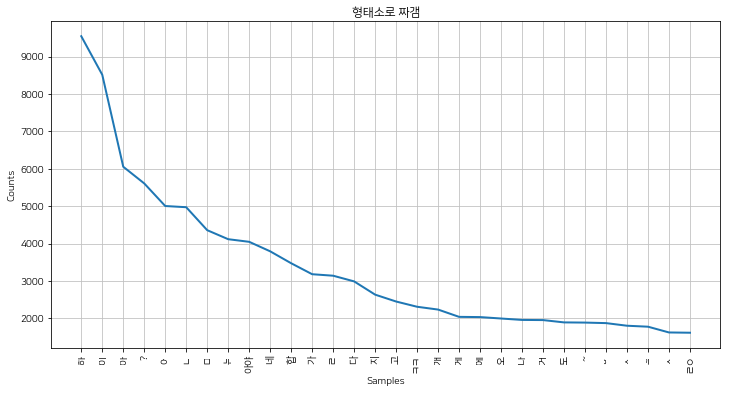

In [73]:
plt.figure(figsize=(12,6))
plt.title('형태소로 짜갬')
# 상위 10개
tk.plot(30)
plt.show()

In [74]:
data=  tk.vocab().most_common(300)
data

[('하', 9544),
 ('이', 8514),
 ('아', 6055),
 ('?', 5609),
 ('어', 5005),
 ('ㄴ', 4973),
 ('ㅁ', 4359),
 ('는', 4118),
 ('아야', 4048),
 ('네', 3794),
 ('합', 3475),
 ('가', 3182),
 ('ㄹ', 3142),
 ('다', 2990),
 ('지', 2636),
 ('고', 2452),
 ('ㅋㅋ', 2312),
 ('개', 2237),
 ('게', 2042),
 ('에', 2036),
 ('오', 1998),
 ('나', 1960),
 ('거', 1956),
 ('도', 1894),
 ('~', 1889),
 ('면', 1875),
 ('자', 1805),
 ('은', 1779),
 ('시', 1625),
 ('ㄹㅇ', 1618),
 ('안', 1617),
 ('ㅋㅋㅋ', 1587),
 ('주', 1566),
 ('았', 1565),
 ('.', 1546),
 ('었', 1486),
 ('되', 1457),
 ('아니', 1393),
 ('보', 1374),
 ('로', 1336),
 ('음', 1335),
 ('님', 1304),
 ('들', 1271),
 ('진짜', 1227),
 ('데', 1222),
 ('야', 1208),
 ('있', 1192),
 ('는데', 1190),
 ('냐', 1178),
 ('말', 1136),
 ('ㅋㅋㅋㅋ', 1024),
 ('좀', 991),
 (';', 988),
 ('기', 965),
 ('낚시', 964),
 ('ㄴ데', 930),
 ('디', 928),
 ('을', 919),
 ('만', 882),
 ('어요', 879),
 ('트', 871),
 ('왜', 852),
 ('잘', 838),
 ('뭐', 836),
 ('먹', 825),
 ('나오', 805),
 ('서', 794),
 ('랑', 773),
 ('미', 768),
 ('요', 762),
 ('ㅋㅋㅋㅋㅋ', 761),
 ('크', 

In [75]:
fontpath = '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'
wordcloud = WordCloud(
    font_path= fontpath,
    relative_scaling = 0.2,
    background_color = 'white')

In [76]:
word_dic = dict(data)
wc_over2 = wordcloud.generate_from_frequencies(word_dic)
wc_over2

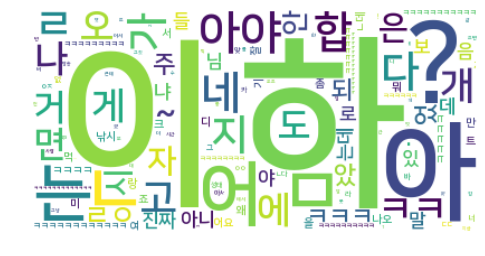

In [77]:
plt.figure(figsize=(8,8))
plt.imshow( wc_over2,  interpolation='bilinear')
plt.axis('off')
plt.show()

In [78]:
tokens_ko2 = []
for wd in tokens_ko : 
    if len(wd) >= 2: 
        print(wd)
        tokens_ko2.append(wd)

점검
점검
겁나
빠르
로스트
아크
ㅂ니다
누구
계획
무기
보이
어요
점검
나연
회복
무조건
아야
방송
400
으시
ㅋㅋ
아니
인정
안함
ㄹㅇ;;
점검
저것
나오
마다
불안
어서
망자
해역
거치
돌아가
어요
성태
므ㅏ애
회복
배틀
거사
다고
학부
ㅋㅋ
ㅁㄷㅂ
다고
아야지
회복
ㄱㄱ
선물
상자
ㅇㅇ
짱닥불
회복
아야지
다고
학부
저것
아마
아침
점검
ㄹ까
없어
이득
모닥불
언제나
니까
요즘
더니
이번
별로
1234567
여기레려~~
이득
ㄴ데
부상
나오
리라는
생각
버리
ㅂ시오
포션사야지;ㅣ
선물
상자
도사
나중
필요
아야지
아야지
어차피
티어
가자
지갑
전사
니까
사자
만사
이제
티어
ㄴ데
아야
아야
380
ㄷㄷ
방송
400
아니
인정
ㅋㅋ;;
티어
금방
ㄴ데
룬웨사
ㅋㅋㅋㅋㅋㅋㅋㅋ
사지
개쌉이득인데
티어
ㅇㅈ
지갑
전사
골드
대비
이득
ㄴ데
어디
성비
많이
이득
가호
는데
필요
ㄹㅇ
개빡치는게
그때그때
초기
채팅
느리
망자
취-약
망자
ㅅㄱ
이혼
지도
취약ㅋㅋㅋ
레이드
두피
어야
회복
배틀
아이템
상자
모닥불
상위
대륙
어서
망자
가도
이틀
동안
숙제
생활
뜷어놓으면
400
무난히
가겟다
자의
해역
에서
유령선
나오
아직
하네
왼쪽으로더ㅏ가
30
ㄴㅈ
pvp셋
어야
느ㅡㅡㅡㅡㅡ릿
난파선
있다
난파선
ㄱㄱ
돌아가
난파
ㅋㅋㅋ
난파선
이다
난파선이ㅏㄷ
난파선
난파선
아깝
난파선
저기
난파선
ㅂㅂ
초기
벌써
흑우
난파선
근데
이것
지도
이제
400
어도
바뀌
난파
ㄴ데
난파선
부터
ㄱㄱ
금방
400
프뉴마-
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
난파선
못하
터지
이제
ㅋㅋㅋㅋㅋ
난파
ㄴ데
당하
난파선
백프로
돌아가
난파
ㅋㅋㅋ
난파선
아서
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅇㅇ먹어져
망자
에서
난파선
못하
ㅋㅋ
난파선
난파
못하
망자
취약
에서
못하
ㅇㅇ
취약
ㄷㄷ
글쎄요
ㅎㅎ
ㅇㅇ
들어가
ㅋㅋ
ㅋㅋㅋㅋㅋ
내구
깎이
ㅋㅋㅋㅋㅋㅋ
난파선
취약
어요
바로
ㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱ
ㄲㅂ
망자
취약
난파선
아깝
ㅋㅋㅋ
ㄴ즈ㅡ
저것
어디
ㄴ지
모르
는데
고맙
읍니다
ㄲㅂ
취약
난파선
아요
아야
스럽
ㄴㅈ


CBT
600
힘들
던데
2렙이
선장
까지
던데
400
깃털
전사
하면
근데
사람
파티
전설
선원
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
도전
어야지
파티
사람
ㄴ데
ㅇㅇ
버프
선원
ㄷㄷ
길이
난입
가능
마리
상점
난파선
관련
선원
어야
유령선
계속
어요
파티
아니
어도
갈수
깃털
이면
레벨
이면
진짜
조온
어렵
어요
지금
기준
틀리
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋ;
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅎㅎ;;
ㅋㅋㅋㅋ
그치
...
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
가끔
유령선
ㄴ다
유령선
만나
버프
선원
대리
고가
저기
사람
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
전설
선원
어야
ㅋㅋㅋㅋ
ㅈㅅ
ㅎㅎ
선원
약화
시키
애가
ㄲㅂ
거의
는데
ㅋㅋㅋㅋㅋㅋ
ㅋㅋ;
1000
어야
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
근성
으로
가능
ㅋㅋ;
마리
상점
확인
그치
...
ㅎㅎ..ㅋㅋ!!..ㅈㅅ;;
지만
도전
ㄴ다며
양심
ㄹㅇ
이면
가능
아악ㅋㅋㅋㅋㅋ
파티
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅈㅅ
ㅎㅎ
이거
ㅋㅋ;;
아니
ㄴ데
아무튼못꺳네
그치
...
킹치만ㅋㅋㅋㅋ
가능
ㅎㅎ;
포기
하네
ㅉㅉ
실망
ㅎㅎ
ㅈㅅ
choeraKjoBut
choeraKjoBut
ㅎㅎ..ㅈㅅ;;ㅋㅋ!!
깃털
30
라면
재밌
성태
가능
이미
파티
많이
재밌
잖아
ㅎㅎ
ㅈㅅ
ㅋㅋ!
ㅎㅎ
ㅈㅅ
전설
ㅅㄱ
ㄷㅋ
당신
라면
해내
짜리
는데
그치
...
......
그렇
수도
ㅋㅋ
그치
...
ㄹ라
아야
합치
ㄷㄷ
깃털
63
가능
지만
..
근데
시간제한
어서
으면
템도
구리
이빨
ㄴ다면서
모르
아서
ㅎㅎ
가능
전설
선원
어야
어요
데큥
63
가능
ㄴ데요
ㅋㅋ
장난이자너~
그치
사나이
김성태
후퇴
지만
...
도전
응원
지만
...

컨설팅
아야
아야
찬란한템때문에
낚시
ㅡㅡ
배우
사람
고고학
ㄱㄱ
채광
해서
찬란
30
모으
1400
상남자
벌목
고고학
생산물
너무
어요
제발
채광
아요
레벨
올리
낚시
금방
에요
그냥
땡기
낚시
아야지
그럼
ㅋㅋㅋㅋㅋㅋㅋ
낚시
채집
채광
아물
거나
아도
채집
낚시
매크로떄문에
고고학
ㄱㄱ
낚시
낚시
생활
무조건
낚시
빠르
려면
정지
이야
낚시
진짜
백수
낚시
렙업용
지금
채광
벌목
수렵
수렵
ㄱㄱ
393
템렙이
알리
ㄴ다
지금
당장
채광
인해
채광
채집
낚시
대세
ㅂ니다요
낚시
빠르
나무
으니까
벌목
ㅂ시다
레벨
낚시
이야
븅신들인가
낚시
빠르
올리
초기
은데
남자
채광
무적
고고학
낚시
레벨
어종
확인
관상
어종
지는
채집
ㄱㄱㄱ
나중
초기
채광
남자
직업
낚시
생활렙
올리
금지
단어
사용
주의
어요
경고
채광
제발
ㅡㅡ
채집
감자
아야
아야
어차피
성태
돈많ㅇ늬까
낚시
아서
렙올릭
ㅗ초기화하면되는데
진짜
로알못쉐리들
ㄹㅇ루
ㅋㅋ;;
상남자
고고학재밋음
필요
으면
낚시
낚시
수렵
ㄱㄱ
고고학뺴고
암거
해도
채집
나무
생활렙
올리
려고
아니
니까
채광
그냥
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
고고학
ㄹㅇ
암거
해도
비슷
틈새시장
으로
고고학
수렵
ㄱㄱㄱㄱㄱㄱ
채광
벌목
채집
사공
너무
이특
채집
고고학
낚시
빠르
모든겜은채광
낚시
렙업하고
초기
자는
어차피
생활
골드
아니
잖아
고학
고고학
아니
상관없
성태
골드
ㄹ라
클라스지
사이트
검색
고고학
아물
거나
ㄹㅇ
수렵
채광
이나
채집
요즘
괜찮
아요
으면
필요
마다
초기
무조건
낚시
상남자
벌목
낚시
아야
이특
낚시
인물
한테
컨설팅
읍시다
아야
아야
필요
으면
낚시
낚시
나머지
사면
고고학
ㄹㅇ
채광
낚시
렙업
빠르
낚시
초기
화해
채광
현금
전사
무슨
낚시
채집
감자
고고학
닥치
채광
채집
으로
플래티넘
필드
렙업
금방
낚시
레벨
끌어올리
갈아타
정답
ㄴ데
ㅋㅋ;;;;
으면
낚시
시간
우시
용이
ㄴ데
ㅇㅇ
렙업
할거
낚시
이특
성태
걱정
벌목
ㄱㄱㄱㄱㄱ
낚시
빠르
올리
초기
그냥
고고학
GoGo
낚시


이빨
ㅋㅋㅋㅋㅋㅋㅋ
배아
아크
여자
트리
시온
아서
주자
베아
누님
ㅇㅈ;
스카
이림
에서
베아
트리스
있다
토토
장로
이쁘
ㅇㅈ이지
ㅇㅈ이지
베아
트리스
이쁘
잖아
베아
트리스
루트
그것
걸리
ㄴ데
처녀
시브
성태
마음
슴마
늑대
헨리
판다
헨리
토토
장로
그냥
포기
이빨
성태
마음
Alt
이빨
주자
베아
트리스
보다
이빨
낚시
시브
ㄴ다니까
충치
누나
충치
누나
선원
알트n
누르
이빨
신뢰
아스
트레
자신
본인
ㅗㅜㅑ
이빨
전설
아스
트레
선원
이빨
이쁘
선원
이빨
선원
아니
퍼스트
키스
이빨
매력
담력
아야
선물
이빨
마음
전설
아니
전설
선원
마음
전설
선원
ㅎㅎ
본인
383
미치
ㅋㅋㅋㅋㅋㅋㅋ
냐고
이빨
...
하룻밤
ㅂ니다
자신
이빨
전설선원ㅇ미
베른
여왕
한테
데이트
가능
무슨
의미
이빨
자신
그것
주냐ㅎㅎ
어요
이빨
라면
담력
아야
기습
대가
ㅗㅜㅑ
이빨
유일한
전설
선원
갈기
파도
전설
선원
으면
이빨
자기
자신
선원
헨리
이빨
포상
ㅗㅜㅑ
크흠
이빨
자기
자신주는거맞음ㅇㅇ
자기
자신
ㅂ니다
선원
칼츠가
개사기인ㄷ
크흠
우리
모두
생각
이빨
본인
호감
올리
여러
ㄴ다고
ㅋㅋㅋㅋㅋㅋㅋ
누르
어서
낚시
시브
이빨
유물
선원
ㅗㅜㅑ
이빨
유물
선원
이빨
본인
얘왤케
노랗
보이
고시
ㄴ데
장착
장착
언제
383
이빨
신뢰
아스
트레
만들
장착
갯수
합치
이빨
지금
이빨
이 섬
마랑
선원
어서
못쓰
니까
버리
383
36
예요
버리
버리
아스
트레
해적
주화
200
필요
던데
ㅋㅋ
버리
버리
어라
스키
어야
창고
버리
톱은걍버리셈
버리
근데
이빨
진짜
까맣
그럼
에바
버리
어요
그냥
버리
잼즈
어차피
벌목스레기라
초기
화해
오ㅡ즈야
ㅋㅋㅋㅋㅋㅋ
개소
리야
ㅇㅇ톱찍어야댐
지그
4랭이잖아
4랭이자나요
최종
기적
시야
걸리
ㄴ다
201
아래
잖아
도구
랭크
잖아
최종
랭크
4렙안보임
견습
어야지
장비
14
ㄴ데
레벨
올리
어야지
아니
오른쪽
볼라
아니
ㅡㅡ
지금
4랭
기적
시야
최종
랭크
어요
최종
랭크
4랭
최종
아래
도구
총합
4랭이자나
먀아아옹
최종
랭

모음
낚시
나오
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
낚씨하다보면
나오
나오
그냥
낚시
낚시
나오
그것
낚시
낚이
낚시
아야지
낚시
나오
낚시
낚시
나오
그냥
ㅇㅇ
지금
38
는데
정수
방임
채집
확률
낚시
생기
ㅇㅇ
그냥
낚시
나오
낚시
그냥
나오
바로
나오
ㅇㅇ
ㅇㅇㅇㅇㅇㅇㅇㅇㅇ
정수
금방
모임
ㅇㅇ
나오
그냥
ㅇㅇ
ㅇㅇ
개금
모음
눈썹
존나웃기네ㅋㅋㅋㅋㅋㅋㅋㅋ
ㅇㅇ
랜덤
정수
넘치
가끔
나오
ㅇㅇ
나오
금방
구하
ㅇㅇ
ㅇㅇ
이건
금방
모으
나오
금방
에요
그냥
나오
잘나
ㅇㅇㅇㅇ
티나
나오
ㅏㅏㅏㅏ
그것
문제
아니
시간
고고학
퀘스트
해보
고거
나오
교환
정수
걍줌
표정
ㅋㅋ
금방
모으
나오
30
겁나
그것
진짜
방임
만들
난이도
ㅋㅋ
표정
봐ㅋㅋㅋㅋㅋ
낚시
티나
나오
눈썹
문신
어요
두뇌
가동
눈썹
ㅋㅋ
눈썹
궁금
보이
ㅋㅋㅋ
고급
재료
아야
니콜
ㄷㄷ
앵그리버드
하면
엄청
나오
시간
정도
만해
금방
나오
모장
표정
ㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅈㄴ
나오
나오
오랫만
머리
려니
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
감자
부하
ㅇㅇ
눈썹
문신
ㅇㅇ
ㅇㅇ
600
마리
편하
ㅇㅇ
에서
돌아다니
나오
걍하셈
ㅇㅇ
ㅇㅇ
낚시
노가다
잊히
도시
추천
드리
어요
모으
낚시
ㅇㅇ
이야
그렇
이야
ㅇㅇ
방임
ㅋㅋㅋ
이야
그렇
그렇
이야
그것
사도
그렇
이야
ㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋ
금방
이야
아니
공부
어요
ㅋㅋㅋㅋㅋ
방임
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
머리
아프
ㅋㅋㅋ
금방
이야
ㄹㅇ
생활
려니까
ㅋㅋ
낚시
다고
그렇
이야
산채
나오
이야
이해
이야
금방
빨리
메모
아라
이야
그냥
피빕이나
어요
머리
아프
낚시
레벨
올리
어요
네네
있다
마리
벅벅
일단
초기
아서
낚시
밀어
ㅇㅇ
골드
로사
이야
그렇
골드
바르
아도
사면
사면
ㅇㅇ
만들
있다
이야
이야
ㅇㅇ
ㅇㅇ
ㅋㅋㅋㅋㅋ
ㅇㅇ
ㅇㅇ
빨리
아서
낚시
초기
아서
낚시
어야
ㅇㅇ
그것
골드
사면
ㅇㅇ
골드
다가
텍스트
과부
한번
더하
ㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇ
ㅇㅇ
엄청
아피스
600
마리
정수
어야
다는
낚시
ㄴ데
그것
모으
못살
그렇
ㅔㅔㅔㅔ

ㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
저것
모으
아야
하는뎈ㅋㅋㅋㅋㅋㅋㅋㅋ
개웃기네진짜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
77ㅓ억
죽쒀서
주네
자체
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
77ㅓ억
웃기
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
개인전
라고
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
77ㅓ억
갸뀰
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
저거
주네ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
꺼ㅓㅓㅓㅓㅓㅓ억
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
개인전
ㄴ데
영차
영차
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
개웃기넼ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ낼름
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
분업ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
청도
븅시니
ㅋㅋㅋ
하네
ㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋ
낼름
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
베이
진짜
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
바보
ㄴ듯
ㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
솔플해
그러니까
ㅋㅋㅋㅋㅋㅋㅋ
꺼ㅡㅡㅡㅡㅡ억
ㅋㅋㅋㅋㅋㅋㅋㅋ
꺼ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ억
보상
빠이
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
영차
영차
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
77ㅓㅓㅓㅓㅓㅓㅓㅓㅓㅓㅓㅓ억
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㄱㅋㅋㅋ
저거
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
웃기
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
동네
바보
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
흐즈믈르그!!!
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
진짜
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
77ㅓ
ㅡㅡㅡㅡㅡㅡㅡㅡㅡ
터지
흐지믈르그~
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
초딩
웃기
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ

이런
안함
다고
이리
당당
ㅋㅋㅋ
당연
ㅖㅖㅖ
ㅇㅇ
ㅔㅔㅔ
당연
스트리머아니였으면
추방
당하
사사
게임
ㅅㄱ
당연히
공략
어야
당연
아니
ㄴ가
ㅋㅋ
당연
누구
는데
훔치
한테
피해줄수읶는건
알아보
아야지
ㅇㅇ
시청자
ㄹㅇ
악질
ㅋㅋ;
공략
잘못
공부
게임
당연
아니
처음
문제
아니
인성
쓰레기
는데
ㅋㅋ
연장자
우대
는데요
ㅇㅇ
는데
그러
아라
어요
공략
아도
ㅋㅋㅋ
ㅇㅇ
빨리
맞쬬?
앍겠으니깐
겡이나
마저
어요
제발
친구
따라
강남
다음
도벽
처음
사람
내놓
으라고
잖아
처음
방패
ㅇㅇ
민폐
근데
진짜
추방
당하
당연
ㅋㅋ
ㄹㅇ
니깐
화나
어요
알리
는데
ㅈㄹ을
계시
잖아요
죄송
ㄴ데
공략
보고
매너
사람
도리
어야
아요
처음
훔치
으니깐
당연
아니
추방
시키
데려가
역겹
ㅇㅇ
인벤
아도
기본
예의
ㄴ데요
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
방금
ㄹ려고
처음
라고
발광
역겹
감자
못하
아나
ㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋ
감자
아저씨
ㅋㅋ
모르
물어보
아야죠
메롱조개
메롱
라고
구질구질
이상
사람
처럼
잖아요
모르
는데
가져가
징징
메롱조개
후딱
이거
모르
배우
어야지
모르
물어보
어요
ㅋㅋㅋㅋㅋㅋ
모르
는데
ㅋㅋ
그러
몰입
당당
모르
훔치
..
처음
니깐
아니
그럼
새캬
ㅋㅋㅋㅋㅋㅋ
도둑
ㄹ려고
사람
혓바닥
모르
는데
가져가
냐고
아니
모르
채우
어쩌
라구
무슨
상관
모르
공부
어요
처음
용서
그럼
알아보
어야
징징
그것
상식
공략
안보
트롤
비난
아도
모르
주화
고서
그럼
물어보
든가
모기
방패
ㄷㄷ
심하
아니
ㄴ데
ㅋㅋ
모르
물어보
어요
자랑
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
모르
는데
탐내
모르
물어보
아야지
채우
라고
예습
어야지
ㅋㅋ
너무
악물
지만
ㅋㅋ
물어보
어야
ㅡㅡ
모르
쒸익쒸익!
모르
찾아보
아야죠
모르
조용히
어야지
...
어이
ㅋㅋ스트리머인게
벼슬
ㄴ가
개소리
메~롱조개
처음
자세
의거
으려고
으면서
이렇
나이많으신분들은안훔치죠?ㅋㅋ
그래서
냐구
ㅋㅋ
눈치
ㅇ벗냐?
모르
아야지
채집
얼른
근데
사람
죽이
처음
죽이
ㄴ다
ㄷㄷㄷㄷㄷㄷㄷㄷㄷㄷㄷㄷㄷㄷㄷㄷㄷㄷㄷㄷㄷㄷㄷ
모르
는

103
평균
ㄴ데
조금
멍청
지만
한형
103
ㅇㅋ
알리
사람
천지
잖아
모르
헤딩해
부터
하면 된다
어쩜
그러
ㅇㅋ
조공
여러분
슬로
스타
ㅂ니다
ㅡㅡ
처음
파티
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
앞니
버리
럭키
돌핀
파티
해서
시청자
개역
ㄹㅇ
21
ㅋㅋㅋㅋ
ㅇㅇ
처음
채팅
면서
배우
메피스
ㅋㅋㅋ
그래
사람
착하
사람
착하
도둑
질도
처음
가능
처음
잘못
미안
다고
아도
그래도
자리
는구나
연필
훔치
ㄹ라고
역겹
가지
처음
나오
아요
역겹
감자
아아
채팅
처음
는구나
공방
아서
파티
이랑
소통
어야
메피스
ㅋㅋ
아아니
나쁘
!!
아야
ㄹㅇ
멍청
답답
지만
재밌
친구
욕탐
ㄱ?
아이
그루
ㄱ?
욕탐
ㄱ?
메모장
이나
메피스
ㅋㅋㅋㅋㅋ
파티
아서
가지
배우
메피스
널리
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
근데
원래
이런
많으
착하
지만
모자라
친구
간신
차단
채집
채광
벌목이훨쉬움
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
내년
광복절
이야
나쁘
그것
레벨
냐고
지금
ㅇㅇ
ㅇㅇ
시청자
대리
고가
입구
ㅇㅇ
고만
어라
ㅋㅋㅋㅋㅋ
ㅇㅇ
착하
지만
역겹
친구
세상
에서
가장
심하
반납
ㅇㅇ
ㅇㅇ
보스
아도
아니
근데
성태
이렇
아니
이런
ㄷ낚시
동수
이랑
갈라서
계속
낚시
아서
레벨
이나
올리
어요
귓말보내는애들
ㅈㄴ찐같네
든지
생활
한가지
도구
준비
상자
에서
나오
그것
아두
우리
다른
상식
가지
보다
반납
반납
보스
열리
상자
다시
낚시
반복
근데
니까
낚시
별로
ㅇㅇ
cheer
100
낚시
생활렙
땡기
다음
스키
리셋
정석
ㅈㄴ
멍청해보인다ㅋㅋㅋ
렙몇?
ㅇㅇ
모르
채팅
ㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
머리
많이
아프
니까
방종
기전
인벤
ㅋㅋ
고민
아야
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
90
ㅋㅋㅋㅋㅋㅋㅋ
너무
낚시
ㄹㅇ
ㄹㅇ
주화
금방
모으
아요
혼자
아도
보통
14
정도
던데
최소
으면
10
ㅋㅋㅋㅋㅋㅋㅋ
낚시
너무
개도
채팅
낚시
지다
무슨
장인
증표
성태
지금
정수
는지
레오
스킨
나오
던데
신비
고대
광석
고대
광석
필요
지금
낚시
갑인
백마
리셋


ㄴ다
직업
취급
던데
너프
버프
오피셜
호크
은근
아니
그건 너
손가락
좋아서
그런
티어
이상
올라가
호크
다던데
기공
ㅂ니다
다른케릭이
상향
너프
안당
할거
은데
호기
방패
오지
ㅋㅋㅋㅋ
ㅇㅈ
인파
지금
애매
ㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
그것
너프
확정
구요
아르카
나나
버프
그것
무슨
상관
ㅇㅈ
그럼
너프
하면
아르
카나
ㄹㅇ임
쪼렙들때문에
패치
ㅋㅋ
니스
손가락
문제
로팡섬은
일퀘낭비지
운영
쪼렙이죠
ㅋㅋ
ㄹㅇ임
1티어떄
다가
고렙되니까
이렇
어요
호크
너프
어도
티어
부터
나요
혹시
니스
여태
까지
편하
올라오
ㅋㅋ
아르
카나
ㅎㅎ;
ㅇㅇ
너프
ㄹㅇ
ㄹㅇㅇ
ㅋㅋㅋㅋ
그렇
너프
ㅎㅎ
전국
니스
트이
모이
어라
쪼렙특)너프무새
아르
카나
ㅇㅈ
호크
거지
나빠지
아니
ㄴ데
데.미.니.스.트
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
op
너프
아야
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
아르카
버프
아르
카나
불쌍
지금
헌터
버프
디트야캐욧
상향
아야지
ㅋㅋ
손가락
문제
인정
ㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
에포나
때문
못하
아르카
버프
어라
니스
ㄹㅇ
ㅋㅋ
너프
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅠㅠ
헌터
계열
라고
견제
하네
ㅋㅋ
너프
이제
으니
호크
돌리
동숙
이랑
나요
ㅈ릌카나
는데
병맛
ㄴ듯
버프
ㅋㅋㅋㅋ
호협
에서
성태
저격
티어
열심히
다가
티어
니까
약하
어요
직업
취급
아르
카나
370
ㄴ데
호크
버프
아야
호크
던가
인간
표창
ㅅㄱ
어야지
ㅅㅂ
버섴좀
살리
불쌍
그냥
너프
하자
그것
아니
아르카
나가
자리
으면
ㅈㄹ
ㅈㄹㄴ
여윾시
니스
너프
걱정
아야
는데
호크
버프
아야지
니스
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋ
ㅇㅈㅇㅈ
메이플
방식
여기
더버프하면ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
아르
카나
너프
으면
어쩌
ㅠㅠㅠ
우리
헌터
끼리
미치
ㅋㅋ
너프
아야지
니스
ㅋㅋㅋ
메이플
패치
그냥
레이드
달라
여기
아야
아야
악물
변호
이유
진짜
너프
당하
아서
너프
하고
원거리
상향
ㅇㅈ
헌터
계열
상향
블래만
카나
버프
양심
어디
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
니스
소리
그냥
나오
너프
하고
원거리
상향
그럼
가진다구?ㅋㅋㅋ
헌터

ㄹㅇㅋㅋㅋㅋㅋㅋㅋ
ㄹㅇ
한글
모르
누나
...
ㄹㅇ
ㄹㅇ
뿌우~
엌ㅋㅋㅋㅋ
솹ㅇㅈ
ㅗㅜㅑ
ㄹㅇ
ㄹㅇ루~
거기
주둔지
이분
쓰렉들
리얼
마인드
개스
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
누님
클럽
던데
씨익
뷔데미니즘
ㅡㅡ
팩트
ㄹㅇ
니스
ㅋㅋㅋㅋㅋㅋ
퀘스트
구연
ㅋㅋㅋ
근데
어차피
성태
공방
공포증
생기
어서
키우
시청자
이랑
잖아
ㅋㅋ
퀘스트
구연
신발
왤케
화가
분이
문제
아니
ㄹ까요
양심
아야
왤케
습니까
불싸앟네요
탈출
지능
순이
구연
ㅋㅋ신발끈
묶음
만큼
으면
가만히
계세
하구
ㅋㅋㅋ
나야
아야
아야
미워하
은데
아니
직업
컨텐츠잖아~
뻔뻔
이상
사람
얄밉
업보
ㄴ데
성태
미워하
구연
코마
티어
아서
아야
아야
개털
구경
ㅋㅋ
아니
ㅎㅎ
진짜
어려운뎅
..
아니
좆같
라서
...
미움
아니
아야
아야
천장
실제
그냥
아서
그래요
ㄹㅇ
누가
그럼
근데
다면서
오래하네..ㅋㅋㅋ
그럼
호크
키우
대체
누구
ㄴ다는
그래서
ㄱㄱ
베르투스때
그럼
징징대
주동
라고
ㅈㄹ했냐
미운건데웋ㅎ
정보
베르투스
입성
으면
상위
10
그럼
그것
진짜
바다
ㅋㅋㅋㅋㅋㅋㅋ
베르투스까지갓는데
는다고
말도안되는소릴ㅋㅋㅋㅋ
호크
부터
어요
베르투스까지면
거의
거지
ㅋㅋ
아무도
구리
니깐
그런
자꾸
피셔
그것
누구
그렇
ㄴ데요
징그럽
많이
으시
그전
베르투스때
너프
데헌그자체.ㄷㄷㄷ
아라
ㅋㅋㅋㅋㅋㅋ
거기
까지
사람
아깝
어서
잘만하고있쮸?
루페온
126
아심
불편
보이
던데
베르투
스미
상위
10
어야
호크
ㅇㅈ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋ
그것
호크
던가
허허
키우
인파
ㅋㅋ
나오
ㅋㅋㅋ
본심
그리고
베르투스때왜접어
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
려나
그러니까
잖아요
ㅡㅡ
아야
아야
수금
시작
ㄷㄷㄷㄷㄷㄷㄷㄷㄷㄷㄷㄷ
아씨
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
하면
ㅈㄹ들이네
나왔죠?ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
나오
결국
ㅇㅇ
인파
티어
별로
성태
나오
니스
이제
그렇
나오
시전
으면
하면
잖아
너프
당하
아야지
지마
ㅔㅔ
아야
아야
상위
정도
ㄹ걸
한하
ㄹㅇ
인파
ㅋㅋㅋ
본심
나오
그럼
호크

블래도
잖아
헌터
끼리
싸우
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
블래
버프
필요
ㅇㅈㅇㅈ~
솔직히
좋아서
저러
서머
하니
..
퓨어
딜러
..
ㅋㅋㅋㅋ
블래는
그럼
블래스터
키우
던가요
아니
솔직히
조용
아야
아니
ㄹㅇ
서머
너는
벨런스
블래
해보면
나약
직업
인구
하위
앱도적
무엇
보다
제일
빠르
블래는
ㄹㅇ
ㅈ헌
블래스터
조용히
꿀빰ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
아르
카나
손보
아야
ㄹ게
ㅈㄴ
여러분
서머
키우
어요
재밌
직업
ㅂ니다
블래
어요
블래가
ㄹㅇ여론조작
ㅆ오짐
블래
아무도
잖아
대신
방패
아니
으면
블레가
블래스터
솔직히
에바
블래는
무력
사기
아르카
서로
너프
피하
ㄹ라고
정치
습니다
블래는
ㄹㅇ
서머
이겜은
장점
아야
아야
블래
어요
서머
버프
블래
호크아이
어야
과학
케릭평가
왤케하냐
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
헌터
왤케
서로
잡아먹
어서
안달
ㅋㅋㅋ
블래는
근데
사람
한판
블래는
그냥
인기
ㅇㅈ
블래는
인구
적잖
블레는
...
빠지
어라
아버
다나
블래스터는
나가
어라
진짜
아르카
거든요
한판
ㄱ?
최강
!!
저것
차단
ㄹㅇ
ㅇㅈㅇㅈ
블래스터특)
자기
안함
아르카
그만
어요
다구요
블래는
저가
ㄹㅇ
블래인구
ㄴ데
블래가
제일
역겹
블래스터
조용히
ㄹㅇ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
PVP
ㄱㄱ?
ㄹㅇ
블래는
저런
하면
블래가
사실
보다
기지
기공사
별로
달달
블레는
인구
블래는
은데
꼬블키?
ㅋㅋ
zㅋㅋㅋㅋㅋㅋㅋㅋㅋ
니스
편하
논하
블래는
그럼
ㅅㄱ
블래는
ㄹㅇ
블래
재미없자너ㅋㅋ
솔직히
서머
너는
상향
아야
ㄹㅇ루
ㅋㅋ
블래는
전체
저수
어도
는데요
pvp
진짜
ㅇㅈ
쫄ㅋㅋㅋㅋㅋ
던가
보정
잖아
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅉ?
ㅋㅋㅋ
블래
진짜
오바
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
그것
구리
니까
파일럿
아야
아야
니깐
블래스터진짜
조용히꿀빰ㅋㅋㅋㅋ
아서
혓바닥
길어지는거봐ㅋㅋㅋ
구질구질
ㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋ
ㅉ?
페이토
따라오
ㅉ?
서열
정리
가자
나요
손차이겟지
ㅎㅎ
ㅉ?
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
블래는
진짜
ㅉ?
ㅉ?
ㅋㅋㅋㅋㅋㅋ
ㄷㄷㄷㄷ
10
ㄴ데
ㄷㄷㄷ
그래서
ㄷㄷ
버

ㅠㅠ
부의
ㅋㅋ
표창이잖엌ㅋ
아나
카나
새서폿이
빨리
나오
아야지
제발
사제
나오
아라
일부
ㅋㅋㅋㅋㅋㅋㅋㅋ
너프
레이드
보스
버프
아라
좆드쉐기들
죽이
일부
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
깃털
달성
아서
그럼
ㄴ데
부터
너프
하자
그대로
가자
ㅎㅎ
원래
서폿은
아무도
니깐
우대
어야
근데
아르
카나
어야
마나
수급
아르
카나
없이
아서
상관없
아니
서폿나오면
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋ
ㅇㅈ
그냥
삭제
뒤치
다고
거리
직업
미야
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
청자
니까
항상
공방
없이
많이
ㅇㅈ
ㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
모두
럭키표창
ㅜㅜㅜ
ㅋㅋㅋㅋㅋ
...
저저
저런
드가
으니까
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋ
천민
팩트
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
기무사
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
천민
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅈ랑미
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
내구
드가
파티
한자리
꼴불견
근데
그건 너
그러
사실
언럭키
가호
시참컨텐츠
명언
버프
다가
죽음
ㅡㅡ
368
자리
랭커
ㄷㄷ
ㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋ
감별
에게
감별
당하
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
천민
ㅋㅋㅋㅋ
천민
아야
아야
ㄷㄷ
ㅋㅋㅋㅋ
저분
럭키
아니
베르투스
본적
없어
수바
으면
레이드
백정
준호
이랑
환상
듀오
아니
없어
는데
으면
골드
많이
깨지
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
재미
떨어지
직업
사람
자체
대접
어야
그스그시
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋ
성태
한테
ㅋㅋㅋㅋㅋㅋㅋㅋ
만나
적도
ㅎㅎ
자업자득
성태
환상
듀오
에서
는다
다른
괜찮아
가리
귀족
돌연변이
ㄷㄷ
미야
박자
오열
ㅋㅋㅋㅋ
아도
보다
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅠㅠ
대리
ㅇㅈㅇㅈ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
백정
ㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ
ㅠㅠ
귓으로
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
귓으로
ㅜㅜㅜ
ㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ
찐따
귓욕;;
귓하는
새기
차단
목록
그것
하네
사람
그것
재밌
어서
대우
노예
찐따
ㅠㅠㅠ
파티
들어가
는데
파장
아르


..
어휴
개그
하네
갇히
버리
인셉션ㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
엌ㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
어휴
움직이
무한
츠쿠요미
무한츠쿠요미
ㄷㄷㄷ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
지능스텍좀
어라
제발
ㅋㅋ
얍셉션
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
야벱션
본가
ㄹㅇ
상자
멍청
정말
대단
지능
니스
지능
문제
지능
진짜
ㄷㄱㄷㄱ
두근두근
ㄷㄱㄷㄱ
망치
망치
지능
진심
ㅅㄱ
망치
망치
망치
구데기
ZZZㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
이야
망치
망치
ㅅㅅ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
에이
ㅋㅋㅋ
망치
망치
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
망치
망치
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋ
망치
망치
!!
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋ
망치
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
망치
망치
장망ㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
나이
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ망치망치
진심
망치
ㅋㅋㅋㅋㅋㅋㅋ
축하
아요
행운
요정
ㅁㅊㅁㅊ
ㅋㅋㅋㅋㅋㅋ
망치
망치
!!!
망치
망치
ㅇㅇ
망치
망치
아크
나오
ㅇㅇ
나이스
ㅇㅇ
ㅇㅇ
밍ㅊ;
밍ㅊ;
ㅇㅇ
망치
망치
ㅋㅋㅋㅋㅋㅋㅋ
dd
ㅁㅊㅁㅊ
ㅇㅇ
주화
ㅇㅇ
ㅇㅇ
sp
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
수고
쓰레기
상자라ㅋㅋ
ㄷㄷ
ㅇㅇ
ㅇㅇ
아크나오는데ㅋㅋ
ㅅㄱ
망치
ㄷㄷ
ㅇㅇ
여기
설계도
는데
하나
ㅇㅇ
망치
망치
상자
마석
그렇
ㅋㅋㅋㅋ
그것
운임
랜덤
랜덤
랜덤
너프
100
아니
나오
랜덤
랜덤
나오
마석
잘안나옴ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
나오
아요
그것
나오
수도
습니다
개안
나오
그렇
난파선
아서
마석
100
아니
확률
이야
마석
난파선
최소
꺼ㅡㅡ억
도키
도키
첵하
ㅋㅋㅋㅋㅋㅋㅋ
나오겟어요?
첵하~
랜듐
첵하~~
첵하
랜덤
첵스
ㅋㅋ
첵하
첵하
에포나
아야
포르페
일해
ㅋㅋ
ㅇㅇ
아야
토템
주제
을라구
ㅋㅋㅋ
나오
난파선
마석
나오
마석
-4
확정
상자
빨간색
으로
상자
에서
나오
첵하
하나
난파선
폭발
스키
레벨
보상
구데기
어요
확정
으로
아냐
난파선
ㄴ다
난파선
첵스
자연
스럽
지나가
레벨
난파선
아서
그런
난파선

무수
악플
ㅋㅋㅋㅋㅋ
팔리
어서
누구
으면
화면
박수갈채
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
아야
싸대
요청
ㄹ걸
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
사회
아마
그것
에바
무수
악수
요청
혹시
..
아야
..
내리
ㅎㅎ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
저것
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
기강
어차피
보정
들어가
매장
당하
얍밍아웃
ㅋㅋ
진짜
너도나도
버스
내주
ㄹ려고
ㄷㄷ
어디
둥가
둥가
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
양학
하네
ㅋㅋㅋ
강약
ㄷㄷ
원콤!
여기
코코
310
이기
좋댄닼ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
다가
제대로
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
다크엠페러
ㄷㄷ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
아까
지만
아도
약하
다며
ㅋㅋㅋㅋㅋ
패턴
이내
그냥
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
다크엠페러
ㄷㄷ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
성태
오늘
귀엽
뭐해ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
거기
올라가면됌
케이지
방향
양학
좋아하
ㅋㅋㅋ
양보
그것
ㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋ
zㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
쫄ㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
추한데ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋ
발리
자강
두천
ㄷㄷ
바닥
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
진짜
다네
하나
도안
다는데
정도
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
다는데
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
강두
저것
살짝
떨어지
어야
성기
쓴는거보ㅑㅏ
성태
아직
모르
어휴
한심
는데
약자
만강
하네
전형
소인배
평균
아야
아야
레전드
ㅋㅋ
인파
드럽
못하
진짜
자강
두천
ㄴ가
인파
못하
지나
아니
은데
열심히
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
인파
못하
는데
지나
자강
두천
설마
이런
한테
지나
트리
똥줄
진다
아니
ㄴ가
ㄴ가
이상
설마
ㅋㅋ
쭉쭉
어어
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅁㅅㅋ
초ㅡ조
슬..슬
설마
한테
ㅋㅋ
이거
자강
두천
죽서
에바
아야

ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
단도
갈수록
못하
ㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
다다
다고
보다
아래
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
어라
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
이건
ㄹㅇ
추하
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
런ㅋㅋㅋㅋㅋ
추하
아야
ㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
아야
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅎㅎ찌발리셨네
ㅋㅋㅋㅋ
못하
성태
angryyapWatching
angryyapWatching
angryyapWatching
angryyapWatching
채널
변경
ㄱㄱ
진짜
추하
빤스런ㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋ
협소
공간
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
추하
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
다찌
추하
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ협소나왓죠
협소도르ㅋㅋㅋㅋㅋㅋ
추태
아야
합하
쟈...ㅅ밥
사람
아니
ㄴ데
진짜
ㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
개쳐발렸네
ㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
추하
템렙속인거임@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
아야
개웃겼다
ㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
핑계
차단
ㅋㅋㅋㅋ


zk
ㅋㅋㅋㅋㅋ
보내
ㄹ라고
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
마썸카
내놓
ㅋㅋㅋ
아뿔싸
역공
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
CurseLit
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋ
서로
다른
게임
견제
지게
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋ
같이
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
마썸
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
같이
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅇㅈ
마썸카나켜
ㅋㅋㅋㅋㅋㅋㅋ
ㅇㅈ
마썸카
같이
이거
떠넘기
엌ㅋㅋㅋㅋㅋㅋㅋㅋ
바로
시동
부터
어라
ㅡㅡ
바로
성태
버리
간다
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
견제
폭탄
돌리
ㄷㄷ
ㄹㅇ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
시끄럽ㅂ고
마썸카
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋ
엌ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
아야
카이
ㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅌㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
스카
이림
ㄹㅇ기대되낟
ㄹㅇ
스카
이림
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅗㅜㅑ
카이
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㄹㅇ
스카이림ㅋㅋㅋㅋㅋㅋㅋㅋ
ㄹㅇ
ㄹㅇ
기대
스카
이림
ㄹㅇㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
성태
스캉리ㅣㅁ
ㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
절대
아야
카이
아야
카이
CurseLit
CurseLit
CurseLit
CurseLit
CurseLit
스카
이림
개꿀잼이겟다
ㄹㅇ
스카
이림
ㄹㅇ
스카
이림
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
얍카이림ㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㄹㅇ
기대
마썸카부터
지렷다
ㄹㅇㄹㄷㄱ
그것
아야
카이
ㅡㅡ
아야
카이
아야
카이
궁금
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
얍카이림ㅋㅋㅋㅋㅋㅋㅋ
얍카이림ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
스카
이림
아야
카이
ㄷㄷ
스카
이림
CurseLit
CurseLit
angryyapPotatos
angryyapPotatos


지루
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
찬란
낚시
근데
ㄹㅇ
ㅋㅋ;
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
거북이
스타일
ㅋㅋㅋ
열심히
ㅋㅋㅋㅋㅋㅋ
열심히
공부
못하
ㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㄹㅇㅋㅋ;;;
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
노트
이쁘
형광펜
ㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋ
ㄹㅇ
ㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
형광
마스터
ㅋㅋ
열심히
는데
성적
나오
채광
찬란
안나
오기
는데
불의
원소
만들
어서
2000
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
머리
나쁘
성태
...
이야
...
ㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
그래서
성적
ㅋㅋㅋㅋㄹㅇ
시험
범위
아니
ㄴ데
공부
스타일
김성태
!!
내실
필기
이쁘
그르
이야
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋ\
잔머리
좋아서
내실
그런
필기
이쁘
그래도
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
그것
ㅇㅈ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
angryyapChexx
angryyapChexx
업적
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
업적
업적
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
업적
ㅁㅊ
살짝
인정
코코
ㅋㅋㅋ
답답
하긴
ㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ\
와우
으면
큰일
업적딸ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
와우하ㅐ
코코
500
크기
업적
ㅇㅈ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
코코
ㅋㅋㅋ
멋있
잖아
...
ㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
피시
방도
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
와우
으면
진짜
큰일ㅇ났다
어이어이
그만
아라
새캬
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
밭농사
을려고
업적
개재밋는데
화장실
ㅋㅋㅋ
ㄴㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
다이아
그렇
는데
전설
선원
자기
이상하다그래ㅡㅡ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
와우
으면
진짜
큰일
5252
ㅋㅋㅋㅋㅋ

그렇
맛있
이야
건빵
는데
건빵
달달
ㅋㅋㅋ
우유
말아먹
으면
꿀맛
는데
행군
바나나
는다
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
그것
신선
아서
그럼
심도
ㅋㅋㅋ
ㅠㅜ
ㅊㅊ
현명
자체
인생
뜨겁
물개
ㅋㅋㅋㅋ
무섭
어서
는다는
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋ
건빵
우유
탈출
지능
ㅋㅋ
훈련소
천주교
에서
토스트
꿀맛
는데
건빵
우유
조합
지능
으시
지능
군대
유일
신선
음식
우유
하나
는데
진짜
소야
미역국
지능
탈출
지능
ㅇㅇ
거래
잡템
한테
ㅋㅋ
포도
껍질
까지
ㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅌㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
양심
어디
미치
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
미치
금수
자체
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
진짜
추하
ㅋㅋ
설계도
모두
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
동숙
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
거래
청자
금수
자체
ㅋㅋㅋㅋ
ㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
금수
자체
금수
자체
ㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
거래
걸리
어서
입장
ㅋㅋㅋ
거래ㅐ걸지마
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
거래
진짜
ㅋㅋㅋㅋㅋㅋ
아야
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋ
인간
어요
라면
캐릭삭제해야됨
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ뜨끔
아야
아야
진짜
사람
ㅋㅋㅋㅋㅋㅋ
와ㅏ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
사람
어요
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ

ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
공짜
좋아하
빠지
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
화요일
논산
입대
편하
어서
ㄱㅊ
자면
첫날
불침번
힘들
ㄴ데
모스
테란
아르테미스
호국
요람
보이
순간
정신
몽롱
니까
안자
ㄹㅇ
리라
당하
...
첫날
불침번
걸리
수도
있징
기무
입대
첫날
불침번
는데
첫날
불침번
기억
안나
침범
는디
ㄹㅇ
훈련소
불침번
가트
부전선
절대
사수
는데
처먹
자꾸
훈련소
둘쨋날
당첨
기분
는데
동수
생활
졸업ㅋㅋㅋ
누구
탈영
해서
매일
는데
이틀
정상아
서지
첫날
불침번
현자타임ㄹㅇ씨게옴
첫날
아야
아야
진짜
회관
입대
부터
밤새
이틀
ㄴ데
고추장
발린
졸업
그래도
보충대
에선
아서
불침번
시키
던데
보충대
불침번
이야
안내
생활
졸업
ㅋㅋㅋㅋ
첫날
불침번
는데
훈련소
..
회관
출신
9999
안자
고가
첫날
짜증
던데
첫날
진짜
꿈인가싶음ㄹㅇ
훈련소
불침번도이씅ㅁ?
9999
ㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
9999
ㅋㅋ
9999
9999
아야
찬란
는디
ㅋㅋㅋㅋㅋㅋ
9999
ㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
생활
졸업ㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
우리
9999
박히
ㅇ어차피
정수
주화
모아
ㅗㅗㅗㅗㅗ
졸업
ㅋㅋㅋㅋ
...
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
임마
생활
졸업
ㅋㅋㅋㅋㅋㅋㅋ
이놈
ㅗㅗㅗㅗㅗㅗㅗㅗ
아야
아야
ㅋㅋ
우리
어다
상관없
이놈
어쩌라고
ㅋㅋ
느낌표
-----
어요
캐슈
던가
리르
냐고
어차피
낚시
아야
우리
어다
아요
아야
아야
회관
출신
ㅋㅋㅋ
어쩌라고
방송
아라
ㅋㅋ
어요
ㅎㅎ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
사실
조금
건들
주제
그것
ㄴ데요
우리
어다
아요
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
아야
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
동수
한테
아라
ㅋㅋㅋ
ㅇㅇ
재료
삐져ㅋㅋㅋㅋㅋㅋㅋㅋ
드리
ㄹ까요
우리
ㅗ애
어다
아야
평소
던가요
ㅋㅋ
달라
그러
ㅋㅋ
우리
ㅋ.ㅋ


이나
하의
으면
끝나
아니
물량
전설
지도
그리고
연마
든지
던가
든지
골드
윗단계
던가
차라리
하의
으면
는데
답답
어깨
비슷
ㄹ걸
레이드
410
먹으먄
진짜
끝나
일단
아야
아야
아라
조화
생활
385
힘들
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
아야
아야
이도
에서
땡기
아야
아야
스승
레바
노스
돌고
그렇
하네
그렇
하네
이래
채팅
멈추
는데
아니
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
이나
돌리
채팅
이렇
올라가
시간
지금
시간
내실
..
ㅇㅅㅇ
지금
대부분
면도
새벽
원래
그렇
아서
385
봇임
돌리
!!!
!!!
!!
티어
레이드
장비
티어
장비
필요
ㄴ가요
부터
돌고
던가
돌리
ㅋㅋㅋㅋㅋㅋ
자랑
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
그냥
이나
일단
돌고
ㄹ지
모르
니깐
투구
하의
맞추
니깐
그냥
부터
아니
370
흔한줄알앜ㅋㅋㅋㅋㅋㅋ
이나
오늘
에서
느낌
ㄴ데
동수
ㅋㅋ
여기
는데
ㅋㅋ
398
399
에서
막히
ㄴ데
때문
385
400
고비
인가
ㅋㅋ
성태
지금
상위
들어가
1200
이면
천원
아니
테란
에서
는데
장비
400
으로
맞추
어도
필요
테란
에서
돌리
중복
나오
ㅅㄱ
ㅇㅇ
398
399
에서
막히
어서
395
어야
ㄴ다고
ㅇㅇ
400
고비
에서
어야
뜷린대요
니까
ㄴ데
생활
스키
하나에
아도
피빕이랑
생활
400렙
땡기
잖아
한자리
대지
서버
전체
보다
루페온
비율
아야
아야
이랑
이랑
통합
루페온
10
정도
성태템렙몇이에요??
ㅇㅇ
가능
아니
395
까지
나오
400
나오
서버
전체
루페온
395
까지
아까
190
근데
300
이상
통계
스키
트리
진짜
역시
서울
레벨
아니
ㄴ가
390
아해
라고
랭킹
검색
사이트
통합
루페온
10
진짜
ㅋㅋㅋㅋ
10
아니
ㄴ데
랭킹
300
그것
검색
사람
기준
ㄴ데
390
아니
ㄹ텐데
아니
티어
랭크
필요
는데
잊히
가면
마도
가면
티어
무조건
5렙낚시터
루페온
ㄴ데
지금
랭킹
431
생활렙
보다
은데
430


나오
ㄴ다니까
아야
아야
or
이렇
시간
빨리
돌리
김성태
얼른
어야
ㅂ니다
야뱝님
기우제
지내
제발
시간
아깝
기우제
가자
아니
시간
아깝
고민
시간
베르투스
마리
이렇
시간
ㄱㄱ
시간
날리
하나
안나
와도
그냥
레이드템올리면됨
벌써
베르투스
반깟죠??
아니
이렇
시간
게임
아니
잖아
기우제
베르투스
반지
아니
이렇
시간
pvp뺑이나
ㅡㅡ
ㄱㄱㄱㄱㄱㄱ
아이고
성적
나오
어떡하지
고민
면서
공부
진짜
ㄹㅇㄹ
뺑이
ㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱ
ㄹㅇ
성태
지금
무조건
기우제
기우제
가자
토크
기우제
ㄹㅇ
시간
아깝
빨리
지금
할거
pvpㄱㄱ
비야
내리
어라
뺑이치자
기우제
지금
기우제
타이밍
시간
기우제
고민
시간
걍자고
심히
시간
차라리
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
이것
시간
아깝
기우제
아야
시간
낭비
개오지
진짜
시계
기다리
성태
잼pvp
벌써
하나
조지
아니
고민
시간
라도
ㅋㅋㅋㅋ
이렇
시간
베르투스
반깟음
ㅅㄱ
행동
으로
옮기
어라
기우제
시간
어서
전설
반지
하나
나르
할거
으면
낚시
라도
이렇
시간
아깝
아니
뺑이지
400
터지
바로
385
잖아
이렇
시간
기우제ㄱ
고민
시간
방송
루즈
빨리
뺑이쳐라
아야
아야
이렇
마다
뺑이
뺑이
돌자ㅎㅎ
ㅋㅋ
라는데
ㄷㅅㅋ제낀다
기우제
면서
고민
아라
ㄱㄱ
이렇
시간
베르투
스도
안감
이렇
시간
바꾸
기우제
할거
잖아
기우제
가즈아
가즈아ㅏㅏ
ㄱㄱㄱ
ㅇㄱㅇ
!!!
!!!
이거
..
ㅇㄱㅇㅇ
가자
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
보이
ㅇㄱㅇ
하네
마미
가즈아
가즈아ㅏ
ㅇㄱㅇㅋㅋㅋㅋ
도로롱좌
ㅋㅋ
숙련
가자
!!!
!!!
!!
쌘애들
데려가
393
이걸하네ㅋㅋㅋ
ㅇㄱㅇ~
411
에바
411
완숙
구하
아서
빠르
411
빨리
111111
면서
살리
라고
411
ZZZZZZZZZZZZZ
진작
가지
411
이거
기우제
411ㅋㅋ
아르카
393
이면
모르
아도
411
반대
성태
살살
아요
ㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
김성태
동수
한테
템역전당함?
411ㄷㄷ
오반
스팟
아야
아야
아직
383
ㅋㅋㅋ
411ㅋㅋㅋㅋㅋㅋㅋ
정예
ㅇㅈ
기우제
효율
저ㅗ사람은
인

하네
없어
버리
저것
여기
블래
emp
반조
자고
훈련
소가
ㅋㅋ
뒤지
ㄹ텐데
ㅡㅡ
핑계
역겹
ㅋㅋ
ㅈ굴아
진짜
수레
은행
시간
에서
충분
버스
오늘
아야
요일
려면
까지
어요
뺑이
도시
ㅂ니까
ㄴ다
뺑이
엌ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
아야
아야
서머
너는
베르투스
사실
허수아비
중간
중간
로딩
시간
잠깐
잠자
ㅋㅋㅋㅋ
제발
휴식
파다
방송
그럼
방송
어요
방송
나오
아야지
미와
함께
라면
파마
마네
그전
나오
기우제
메타
ㅋㅋㅋㅋㅋㅋㅋ
점검
이자
빤스
뻉이쳐야되는데
방송
인디언
기우제
ㄱㄱㄱㄱ
그렇
거지
ㅋㅋㅋㅋㅋ
는데
잘하는뎅
낚시
ㅈ노잼일거라
ㄹㅇ
노캠ㄱㄱ
레이드
계속
에요
아라
ㅗㅜㅑ
다시
인디언
시간
충분
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
니까
스키
는데
시간
개부럽
ㄷㄷ
ㄷㄷ
384
파티
우투
브레스
으려고
가호
은데
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋ
레스
ㅗㅜㅑ
수확
못하
계속
아니
공지
저것
도배
ㅈㄴ하네
다고
ㄹㅇ
아하
감사
ㅂ니다
384
파티
도망가
ㅋㅋ
계속
그냥
시간
마다
아니
은데
성태
성태
근데
2633
에서
아하
이랑
동수
밖에
나요
30
ㄴ가
블래
계속
타마
아야
아야
근데
진짜
으로
저렇
우겨넣
힘들
어서
얍얍히
거보
거의
상위
수준
으로
다가
는데
평가
너무
슬프
ㅠㅜ
던데
끠유
PVP
다가
재미없
은데
근데
같이
홍도
홍이
블래
타마
마나
어서요
아야
아야
근데
못하
바로
가나
그렇
안함
ㄹㅇ
ㅇㅈ
자마자
ㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋ
숙련
ㅇㅈㅇㅈㅇㅈ
ㅇㅈ
자마자
바로
버리
간신
진짜
ㅎㅎ
중독
ㄹ까
아도
해골
저것
억지로
다르
ㄴ게
아서
헌터
지금
레바
노스
뺑이
스트리머중에
고렙은
망치
망치
!!!
coffeeroad
금지
단어
사용
주의
어요
경고
코앞
진자
아야
아야
처럼
으로
우겨넣
진짜
힘들
어요
아야
아야
에서
실력
상위
다음
니스
간신
ㅂ니다
성태
얼마
는데요
그만
그것
아니
아요
키우
는데
이것
상위
..
근데
너무
간신
ㄴ데
간신
ㅂ니다
깃털
실력
상위
ㅇㅈ이지
그럼
사실
미도
상위
아니
ㅋㅋ
아야


기회
주자
시청자
ㅋㅋㅋ
그스그시
ㄹㅇㅋㅋ
아니라고ㅠㅠ
망치
피빕이나
아라
ㅋㅋㅋ
피빕
붙이
아니
화랑
진짜
지렁이
망치
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
풍월
망치
그분
기회
주자
망치
집단
비하
ㄷㄷ
그스그시
ㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
찐따
오늘
시청자
웃기
네요
망신
그만시캬라
졷굴
내일
군대
ㄴ다고
스트리머
아서
그렇
ㅎㅎ;;;
망치
트통령인데
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
황금
망치
강철
망치
기억
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
둘이하래ㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋ
트통령
망치
ㄴ데
...
인방
ㅋㅋ
그때
황금
망치
강철
망치
는데
ㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
풍쉐
디스
ㄷㄷ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
형제
방장
듀오
은데
관전
망치
망치
망치
망치
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
당황
ㅋㅋㅋㅋ
트통령
망치
ㄴ데
라서
당하
구지
디트특
그냥
아야
투자
아야
아야
트통령
디스
ㄷㄷ
그렇
물어보
무조건
자기
트이
ㄴ데
ㅋㅋㅋㅋㅋ
빨리
초대
ㄱㄱ
황금
망치
강철
망치
기억나
ㅋㅋ
황금
망치
강철
망치
ㅋㅋㅋㅋㅋㅋㅋㅋ
394
생활
트통령
인성
하네
지금
철망
ㅋㅋㅋ
394
ㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋ
철망
내실
비키
거라
노예들아ㄷㄷ
인생
어라
진심
말투
망치특이네ㅋㅋ
생활
마스터
인생
ㅇㄷ
준호
나나
내실
도랏네
미치
ㄷㄷㄷㄷ
생활
인생
내실
ㄷㄷ
인생
어요
진짜
내실
에서
인생
친구
아도
지만
제발
인생
인생
어디
내실
ㄷㄷ
진정
ㅐ실
내실
실생활
...
정석
이다
미리
레이드
생활
이랑
피빕했네
ㄹㅇ
내실
르네
인생
어요
ㄷㄷ
제발
진짜
생활
410
은데
근데
394
현실
생활
...
실생활
과연
...
저분
진짜
점검
수면
아니
인생
어요
아가
현실
신분
인생
어라
...
바꾸
402
라서
오늘
시간
밖에
자시
어서
블래가
범인
바꾸
언제
까지
어요
인생
제발
..
인생
지적
하네
ㅋㅋ
먼지
던데
쓰레기통
구리
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅈ굴은
맨날
입대
이래
잡템
on
스레기통
ㅋㅋ
아야
기통
쓰레기
처리
ㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
인벤


드디어
경지
보이
어제
다르
이번
다르
꼬리
너무머싯다
angryyapLight
angryyapLight
angryyapLight
역겹
감자
ㄴ데요
고이
이제야
숙련
아야
아야
템렙
지금
한대
피하
피격
리어
나요
383
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
383
이것
아야
아야
ㅋㅋㅋㅋㅋㅋ
ㅋㅋ
ㅋㅋㅋㅋㅋ
ㅋㅋㅋ
완벽
이건
표정
아니
이봐
ㄹㅇ무쳣자너
ㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
어요
ㅇㅈ
제발
어라
일단
척하
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㄴ다고
ㄹ려
아도
표정
말못학ㅆ어
첵스
머리
만큼
강하
사나이
피격
풀리
어서
소리
니까
이리
웃기
ㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋ
ㄲㅂ
아야
아야
역겹
는데
는데요
ㅇㄱㅇ
어거지
아니
자마자
ㅋㅋㅋ
기동력
근데
한테
핑계
ㄴ다고
하드
자기
으니까
핑계
동기
바퀴
진짜
ㄴ다
채팅
치기
바로
직전
는데
표정
니까
절대
회피
ㅇㅈ
ㄷㄷ
회피
ㄹㅇ
회피
버프
표정
에바
ㅋㅋ
ㄹ텐데
조동
아리
진짜
얼굴
이랑
가만
하긴
는데
ㄹㅇ
주둥이
방정
ㅋㅋ
조동
아리
니까
못하
ㄹㅇ
칭찬
사라지
아무리
아도
ㄹㅇ
얄밉
ㅋㅋㅋㅋ
아도
변명
처럼
들리
어서요
진짜
ㅗㅜㅑ
얼굴도냅둬랰ㅋㅋㅋㅋ
아까
워로드
사람
어디
원래
매드무비
목소리
들어가
솔직히
다이아
나름
게임
는데
세가
ㅋㅋ
동수
이랑
같이
박히
ㄴ다
완숙
아야
ㄷㄷㄷㄷ
저러
아서
밥줄
끊기
이번
완숙
어요
어요
챌린저
라도
다물
방송
ㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅇㅇ
이상
ㄴ디
ㅋㅋ
상하
구하
이상
...
ㅋㅋㅋㅋㅋ
그스그시
만나
아서
이상
ㅋㅋㅋ
ㄴ다
이상
트이
상하
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
호크아이
어떻
레이드떄
상하
ㅅㅂ
ㅋㅋㅋㅋㅋ
그냥
워로드
그렇
지금
블래가
만능
보조
딜러
라서
조합
아깝
그냥
ㄴ데
ㄴㄷㅆ
워로드
직도
실버
일거
온천
달걀
라는
에요
온천
반석
달걀
다이아
ㄴㄷㅆ
ㄴㄷㅆ
구연
ㄴㅁㅂ?
수레
시간
훨씬
빠르
는데
애꿎
짤리
랑빜ㅋㅋㅋㅋㅋㅋㅋㅋ
여기
그럼
워로드
다시
망치
호크아이
레이드

데려가
킹직히
딜러
는데
버프
미터기
라는
그렇
니까
미터기
자는
ㅋㅋ
팩트
방어력
70
어라
베르투스
도망가
도망가
위치
ㄴ데
신호
아끼
다물
은데
어차피
스마
에서
만들
건데
ㅋㅋㅋ
아르카
해보
ㄹ래
미터기
없어
직업
거르
ㅋㅋ
진짜
이정
이면
데려가
지금
아르카
는데
미터기
나오
더없
ㅅㄱ
미터기
나오
사장
직업
아니
박제
ㄹ걸
ㅋㅋ
나도
거름
그래서
1212
너프
ㅎㅎ
으면
걍뒤지는거임
티어
레이드
에서
거르
아르카
나가
불쌍
토템
능력
인정
는데
리얼
성태
깃털
장인
을라고
발악
토템
인분
ㅇㅈ
그렇
미터기
원하
와우
아야지
거르
둘째
치고
너프
근데
성태
없이
간적
다른
직업
힘들
실력
으로
뽑히
아시
385렙
으면
데려가
근데
아르
카나
진짜
별로
미터기
싫어하
고자
하긴
아야
토템
성능
장난
아니
헤딩팟
없이
사람
ㅈㄴ많은데
ㄹㅇ
정보
시간
트라이
산물
성태
상승
토템
성태
한테
거의
첵오급
자기
으면
아야
토템
효과
보고싶다
인분
인정
수금
박사
ㅋㅋ
성태
시청자
수금
박사
ㅋㅋ
왜냐면
다른
가호
못하
니까요
미터기
나오
제대로
나오
아야
버프
자기
나중
인용
애드
나오
을까
개인
합산
애드
나오
은데
스트리머라서
드가
항상
부럽
따리
진심
톹0ㅁ
역할
아도
성태
1인븐
거지
스트리머
특혜
하나
워로드
인파
기공
잡음
ㅈㄴ게
는데
위로
갈수록
귀하
진심
ㅋㅋㅋㅋㅋㅋ
자기
나머지
ㅋㅋㅋ
이것
그것
아심
미터기
ㅋㅋ
결과
이것
자신
보이
으면
걸맞
애드
외부
프로그램
함부로
영정
당하
레이드
끝나
결과
창정
은데
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
수레
ㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
항상
패턴
ㅋㅋㅋ
그냥
ㄴ데
기울어지
운동장
레고
사람
재밌
아니
언덕
이제
지형
하네
워로드
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
거르
이유
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋ
zzzzzzzzzzzzzzzzzzzzzzzzzz
2깃ㅋㅋㅋㅋㅋ
수레
ㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
수레
조금
아니
수레
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
수레
수레
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
수레
ㅋㅋㅋㅋ

저분
특이
ㅡㅡ
디트욕하지마세요
더라
망치
거르
ㄴ다
ㅋㅋㅋㅋㅋ
맨날
290
짜리
매칭되던데
망치
천민
자꾸
겸상
주제
모르
이자
빠르
진짜
이것
모르
이랑
가면
진짜
이리
역겹
타나토스
이름
이바
멀리
떨어지
코코
나오
멀리
떨어지
어도
속도
ㄷㄷ
빠르
쭉쭉
380
으뜨케든
으려고
트리
근데
초반
나오
거울
으면
아파하
음~챠~
거울
지지
어야지
ㅋㅋㅋㅋ
보정
ㅇ낳음?
수류탄
투척
겉멋
ㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋ
거울
겉멋
겉멋
블래스터
실드
나오
ㅅㄱ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋ\\
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
레이저
ㄲㅂ
설마
예전
오줌
생각나
ㅎㅎ
거울
도망가
이나
똑바로
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
거미줄
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋ
자모
ㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
추방
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
추방
제발
추방각ㄷㄷ
추방
강퇴
ㄱㄱ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
여기
추방
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
여기
에바
추방
ㄱㄱ
제발
전멸
아라
이거
ㅋㅋㅋㅋ
;;ㅎ
이벤트
에서
추방
강퇴
사람
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅡㅡㅡㅡㅡㅡ
여기
인간
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
수레
추방
가즈아ㅏㅏ
여기
추방
추방
추방
ㄱㄱㄱㄱ
절멸
!!
레바
으시
다구
역시
여러
가지
하네
이런
분이
는다
구요
추방
여기
버0------스
추방
ㄱㄱ
응원
ㅋㅋㅋㅋㅋㅋㅋ
이벤트
던전
진짜
공방
으면
ㄹㅇ추방이다
뿌뿌뿌뿌ㅜ
응원
추방
드리
민폐
레전드
ㅋㅋ
추방
추방
당하
레전드
여기
버----스
저기
버----스
버스
타네
ㄷㄷㄷㄷㄷ
뻐기
까지
공방
추방
추방
노래
ㄱㄱㄱ
ㅎㅎ;
파티
추방
채팅
으로
드리

저것
ㅋㅋㅋ
매운맛
니까요
주의
다고
는데
그것
모르
주의
잖아요
ㄴ데
매운맛
사놓
ㅈㄹ하네
억ㄲㄲ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
점검
시간
기다리
주의
는데
당연히
첵스
저기
들어가
아요
신라면
이상
시보
ㅂ니다
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
그것
으면
괜찮아
ㄹㅇ
매운맛
니까
ㅎㅎ;;
다고
생각
매운맛
주의
보심
매운맛이쟈너
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
니까
ㅋㅋㅋㅋ맵죠
해골
만두
ㅋㅋㅋ
ㅇㅇ그거
매워
다고
는데
당연히
주의
ㅋㅋㅋㅋㅋㅋ
불똥
연기
이건
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋ
오즈
귀여워
BibleThump
사내자슥이
가지
으면
똥고
일체유심조
모르
어요
스읍
ㅋㅋㅋㅋ
버퍼
오늘
방송
ㄴ다는
진짜
스흐읍
근데
오늘
방송
내일
수레
예약
저것
진짜
ㄴ데
아야
아야
신라면
다고
스읍
ㅋㅋ
어요
언제
매웃맛
단련
으로
기강
내일
성태
오늘
시엔
키시
방송
그냥
방임
그것
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
오늘
저녁
까지
수레
에바
zzzzz
수레
수레
ㅋㅋ
비유
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
오즈
무늬
상당히
하네
똥고
수레
ㅋㅋㅋㅋㅋㅋㅋㅋ
ㅡㅡ
아요
무슨
라면
ㅋㅋㅋㅋ
버리
아라
오늘
저녁
ㄴ다고
안함
고통받겟네
입김
아요
어차피
는데
방송
손가락
아야
신라면
내일
누구
맘대로
ㄹㅇ루
사실
손가락
뜨겁
ㄴ가
그렇
다면
아야
아야
매운맛
ㄴ가요
ㅗㅜㅑ;;
는다
는데
ㅗㅜㅑ
내일
방송
배고프
ㅋㅋㅋ
ㅋㅋㅋ
만두
오즈
아라
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
표정
ㅋㅋ
아야
보검
ㄷㄷ
아야
이쿠
표정
아라
눈썹
뵤루지난거봐라
오즈
기절
ㅋㅋㅋㅋㅋㅋㅋ
완전
매워
조용히
처먹
으시
angryyapHaetae
angryyapHaetae
angryyapHaetae
angryyapHaetae
오즈
망부
아야
아야
반입
화면
보이
어요
눈썹
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
아야
아야
만두
싫어하
나요
아도
!!!
단무지
오늘
아야
요일
아야
아야
만두
닮음
ㅋㅋ
마이크
낚시
방송
ㄱ?
ㅋㅋㅋㅋㅋ
뜨겁
표정
완벽
ㅋㅋㅋㅋㅋㅋㅋ
ㄹㅇ
오즈
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅇㅈㅇㅈ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ


매크로
ㅋㅋㅋ
첵스있었냐
만두
매우
ㄴ가
역겹
어요
매워?...
ㅗㅜㅑ
야뱝님
에서
고양이
냄새
많이
이것
니깐
배고프
어떻
이도
오토
제모
ㅡㅡ
오즈
어라
ㅡㅡ
ㅋㅋㅋㅋㅋㅋㅋ
불닭
에다
공화춘
개꿀ㅋ
소매
방송
어요
오즈
진짜
활기차
ㅋㅋ
오즈
권투
연습
ㄷㄷ함
는데요
오즈
ㄷㄷ
어요
거도
오토
ㅋㅋ
관리
는데요
하루
첵오랑
분이
어요
혼자
드세
ㄱㄱ
ㅋㅋㅋㅋㅋㅋㅋ
ㅇㅈ
코코
하네
핫식스
하나
달리
ㅂ시다
ㅎㅎ.
오즈
펀치
무지
빠르
ㅋㅋ
ㄷㄷ
비비
삼겹살
땡기
ㄴ다
네넴띤
저러
ㅋㅋㅋ
팔도
냉면
으면
천국
ㄴ데
비비
라고
겨울
안나
ㅋㅋ
비비
삼겹살
ㄴ데
아야
아야
오즈
한테
는데
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
진짜
오즈
혼자
네넴띤
ㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋ혼자
아주
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
팔도
네넴띤
하나
오즈
진짜
혼자
ㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋ
오즈
덩치
저러
엌ㅋㅋ
파이트
ㄷ;
오즈
성태
비비
혼자
ㅋㅋ
환장
하네
부가
어서
......
괄도네넴띤
ㄷㄷ
연습
아직
거든
ㅋㅋㅋㅋㅋ
코코
그렇
ㅋㅋ
부가
어서
샘솟
ㅋㅋㅋㅋㅋㅋㅋ
질리
버리
첵스
오즈
첵스도
한때
저러
는데
코코
언제
코코
수확
언제
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
..
첵스진짜
ㅋㅋ
오즈
지게
하네
그렇
다고
첵오랑
어요
테스토스테론
...
첵스가
질리
다니
ㅋㅋㅋ
첵스는
어른
이야
첵스는
기분
향기
ㄴ다
수확
니까
체력
넘치
버리
오즈
콩알
시체
ㅋㅋㅋㅋㅋㅋㅋ
첵스는
오즈
코코
언제
수확
아요
그것
니까
에너지
넘치
잖아
나루
다이
다이
악질
ㅋㅋㅋ
ㅋㅋㅋㅋㅋ
원래
누나
남동생
이기
오즈
로스트
어야
ㄹㅇ
데려오
첵스가
오즈
노심초사
는데
ㅋㅋ
빨리
모코코떄문에
그리
그것
그러
로스트
저런
장난감
매달
으면
난장판
ㅋㅋ
부가
잖아
ㅇㅈ
ㄹㅇ
부가
안전
자산
오즈
ㅇㅈ
채팅
텨짖다
오즈
ㅋㅋㅋㅋ
아야
아야
역겹
아야
아야
잖아
ㄹㅇ
그만
때려ㅛ;
부가
안전
는데
때리
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
이번
오즈
웃기
네요
아야
아야
역겹
어요
아야
아야
안전
자산
오즈
받이
아야
아야
역겹
ㅋㅋ
ㅋㅋ

터져욧
눈알
빠지
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
아니
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ장난해?
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
일단
보류
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋ
난독증
모자
어요
ㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋ
머리
아프
요약
alt
누르
어서
이름
검색
그냥
나오
아요
여기
필요
보기
만해
씅질머리난다
성태
머리
터지
어요
!!
!!
ㅈ좀더
이쁘
만들
어라
제발
연마
할거
모자
ㅋㅋㅋㅋㅋㅋㅋㅋ
이제
다른
아예
ㅂ니까
아니
어차피
400렙으로
바꾸
생활
아야
너무
티나는데ㅋㅋㅋ
ㅈ같은
보노보노
이제
와서
해보
아야
잖아
모자
진리
소켓
때문
그냥
키우
머리
장갑
pvp
생활
지금
제일
다던데
...
ㅇㅇ
생활
연마
할거
모자
아야
아야
지마
시청자
외우
일단
머리
장갑
만들
연마
장갑
상의
라서
모자
재료
어서
평생
ㅎㅎ
니모
2500
어떻
모으
마블
이후
최고
게임
니모
ㄹㅇ
개빡셈
시청자
보고
외우
가르치
댓글
가독성
하나
습니다
물고기
주구
장창
으란
ㄴ가
연마
옥이네
니모
금방
모으
20
바퀴
모음
아직
상위
구간
템선택권이
별로
상의
니모
가도
100
마리
구하기
힘들
참고
무기
나오
는데
무기
장인
증표
필요
ㄴ데
플래티넘
주화
50
들어가
ㅋㅋㅋㅋ
ㅇㅈ
이것
이거
ㄹㅇ
이거
이렇
정리
아야지
이거
이거
정리
장인
증표
그냥
낚시
나오
아요
이것
제대로
배우
친구네ㅋㅋ
ㅇㄱㄷ
ㄹㅇ
저것
다운해야겟다
정수
30
600
600
600
교환
랭크
물고기
정수
낚시
엄청
구하
어요
그것
만들
려면
600
정수
교환
600
랭크
채집
600
교환
ㄴ다고
랭크
채집
랭크
채집
랭크
물고기
600
마리
600
바꾸
는다고
600
필요
다고
이해력
진짜
기준
으로
물고기
600
마리
저거
이해
못하
랭크
재료
600
생활
의정
아야
로그인
들어가
랭크
채집
생활템
연마
까지
올리
근데
낚시
너무
시끄럽
골드
ㄴ다
이야
ㅇㅇ
ㅖㅖ
연마
재료
떢상하겠네
ㅇㅋ
제작
는데
만들
는데
노가다
엄청
아야
랭크

아니
니말
ㅇㅈ라고여
ㅇㅈㅇㅈ
ㅇㅈㅇㅈ
ㅇㅈㅇㅈ
우리
성태
들어주
훈훈
저기
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅇㅈㅇㅈ
ㅇㅈ
ㅋㅋㅋㅋㅋㅋㅋㅋ
ㅇㅈㅇㅈ
워로드
수레
심하
아니
차이
ㅎㅎㅎ
ㅇㅈㅇㅈ
ㅇㅈㅇㅈ
ㅇㅈ하니까
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㄴㅇㅈ
ㅇㅈ
ㅇㅈ
ㅇㅈ
ㅇㅈㅇㅈ
ㅇㅈ
ㅇㅇ
ㅇㅈ
ㅇㅈ
ㅇㅈ
ㅇㅈㅇㅈ~
ㅇㅈ
ㅇㅈㅇㅈㅇㅈ
ㅇㅈ
ㅇㅈ
ㅇㅈㅇㅈㅇㅈ
ㅇㅈㅇㅈㅇㅈ
ㅇㅋ
ㅇㅈ
ㅇㅈㅇㅈ
ㅇㅈ
ㅇㅈ
ㅇㅈㅇㅈ
ㅇㅈ
ㅇㅈ
ㅇㅈ
ㅇㅈ
ㅇㅈㅇㅈ
ㅇㅈ
ㅇㅈ
ㅇㅈ
ㅈㅇ
ㅇㅈㅇㅈ
ㅇㅈㅇㅈ
ㅁㅈㅁㅈ
ㅇㅈㅇㅈ
ㅇㅈㅇㅈ
ㅇㅈㅇㅈ
ㅇㅈㅇㅈㅇㅈㅇㅈㅇㅈㅇㅈㅇㅈㅇㅈㅇㅈ
ㅇㅈㄸㅇㅈ
ㅇㅈ
ㄴㅇㅈ
인정
어인
엌ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
좋네ㅐ~
ㅇㅈㅇㅈ
니말
ㅇㅈ이라고
ㅇㅋ
ㅇㅈ안하는거
ㅇㅈ
그것
ㄴㅇㅈ
ㅋㅋ
ㅇㅈㅇㅈ
조용히
ㅂ쇼
ㅇㅈㅇㅈ~
자마자
ㅇㅈ
ㅇㅈㅇㅈ
ㅇㅈㅇㅈ
ㅇㅈㅇㅈㅇㅈㅇㅈㅇ
어요
ㅇㅈ
ㅆㅇㅈ
ㅇㅈㅇㅈ
ㅇㅈ
ㄴㅇㅈ
모르
아도
ㅇㅈ
ㅇㅈㅇㅈㅇㅈ
어제
수레
ㅋㅋㅋㅋㅋㅋㅋ
워로드
3수례가
말이
ㅇㅈㅇㅈ
ㄴㅇㅈ
ㅇㅈㅇㅈ
ㅇㅈㅇㅈ
ㅇㅈㅇㅈ
ㅈㅇㅈㅇㅈ
강하
자라
아야
우리
성태
ㅇㅈ라구여
ㅇㅈ
ㅇㅈㅇㅈㅇㅈㅇㅈㅇㅈㅇㅈㅇㅈㅇㅈㅇㅈㅇㅈㅇㅈㅇㅈㅇㅈㅇㅈㅇㅈㅇㅈㅇㅈㅇㅈㅇㅈㅇㅈㅇㅈㅇㅈ
ㅇㅈ
ㅇㅈ
ㄴ다
ㅇㅈ
ㅇㅈ?
ㅇㅈㅇㅈ
ㅁㅈㅁㅈ
ㅇㅈㅇㅈ\
ㅇㅈㅇㅈ~
성태
ㅇㅈ
ㅇㅈㅇㅈ
oㅈ
ㅇㅈ할게있어야
ㅇㅈ을하죠
ㅇㅈㅇㅈㅇㅈㅇㅈㅇㅈㅇㅈ
ㅇㅈㅇㅈ
ㅇㅈ
ㅇㅈㅇㅈ
니말
ㅇㅈㅇㅈ
ㅇㅈㅇㅈㅇㅈㅇㅈ
ㅆㄴㅇㅈ
아무튼
ㅇㅈ
ㅇㅈㅇㅈ
ㅇㅈㅇㅈ
ㅇㅈ할게
ㅇㅈㅇㅈㅇㅈ
ㅈㅇㅈㅇ
ㅇㅈㅇㅈ
인정
어인
엌ㅋㅋㅋㅋㅋㅋㅋ
ㄹㅇ
꾸준
수레
ㅇㅈㅇㅈ
ㅇㅈㅇㅈ
자마자
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
어도
그러
ㅇㅈㅇㅈㅇㅈㅇ
ㅇㅈㅇㅈ
0ㅈ
역겹
어서
ㅇㅈ
으면
어요
ㅇㅈ한번해줬으니
이제
ㅅㄱ
아야
아야
ㅆㅇㅈ
성태
ㅇㅋ
지금
우리
아야
아야
ㅇㅈ한다
ㅇㅈㄸㅇㅈ
우리
한테
생각
어요
ㅡㅡ
우리
성태
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
조용히
환불
츤이잖아
ㅇㅋ
ㅇㅈ
우리
ㅇㅈ안해준거
ㅇㅈ
성태
ㅇㅋ
ㅇㅈ
달래
어서
열심히
습니다
ㅇㅈㅇㅈ~~
ㅇㅈㅇㅈ
ㅇㅈ
ㅇㅋ
ㅇㅈ
ㅇㅋ
ㅇㅈ
지금
ㅇㅇ
그스그시
고연
기분


반지
나오
ㄴ다
IPX
128
원래
강하
바라
나오
바라지
늑머
원래
정도
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
팀원
ㅋㅋㅋㅋㅋ
원래
ㅂ니다
버프
성태
좋은 아침
ㅔㅔ
시시비비
가리
이것
아니
ㄹ까요
ㅎㅎ;
버스
너무
으시
네요
수레
ㅇㅈㅇㅈ
아야
아야
내공
방출
려고
와리
가리
던데
버프
구라
출근
면서
어떻
게든
려는
아니
그럼
던가요
수레
파티
사기
떨구
는데
ㅋㅋㅋㅋ
성태
파티
아야
ㅇㅈㅇㅈㅇㅈㅇㅈㅇㅈㅇㅈㅇㅈㅇㅈㅇㅈㅇㅈㅇ
수레
버스
아니
택시
수준
던데
ㅇㅈ
기공
동선
겹치
마다
ㅇㅈㅇㅈ
발끈
ㅋㅋ
아니
그럼
해보
든가
기공
계속
와서
버프
던데
남몰래
드리
ㅇㅈㅇㅈ!
ㅇㅈㅇㅈㅇㅈ\
끄덕끄덕
그냥
뒷좌석
에서
버스
아니
케텍스
ㅇㅈㅇㅈㅇㅈㅇㅈㅇㅈㅇㅈㅇㅈ
성태
템렙
그대로
기억력
나쁘
누구
정치인
아니
랄까
물약
으로
어야
숙련
아니
성태템렙역전당함ㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
eㄷㄷㄷㄷㄷㄷㄷ
ㅋㅋㅋㅋㅋ개웃김
ㄷㄷㄷㄷ;
미리
핑계
ㄷㄷ
밑밥
ㄷㄷㄷ
빠르
빠르
수레
ㅇㅈㅇㅈ
오예
배틀
아이템
15
ㅇㅈㅇㅈㅇㅈ
zzz
10분
하면
레전드
잡히
아니
ㄴ지
..크흠
성태
정상
기공사
ㅎㅎ
티어
갈수록
이제
입질
없어
워로드
ㅅㄱ
창조
으로
수레
다는
의지
ㅠㅠ
레전드
블레
버프
ㅋㅋ
기공사
템렙
12
정식
오픈
아가미
에서
나오
는데
에서
나오
베르투스
어깨
깡패
베르투스
목젖
부터
나오
ㄴ다고
생각
판정
이상
성태
레바
노스
절대
못하
티어
생활
올리
어서
기가
사나이
김성태
못하는게어딧냐
는데
어요
원기
는걸
못하
근데
갑자기
10렙이
오르
우리
성태
무시
아야
아야
템렙
인지
버프
보소
방제
어요
레바
노스
베르투스보다
어렵
다던데
대로
에요
이것
보다
어렵
다구요
오진
골드
회수몹
ㅇㅈ;
아야
아야
스키
포인트
다얻으셧음?
ㅇㅈㅇㅈ!
건스
다쿠
ㅋㅋ
아이템
던지
레바
노스
무덤
ㅋㅋ
그래서
사람
패스
가자
버프
으니
이렇
성태
오늘
방송
언저리
는데요
오늘
아니
오늘
방아
요일
ㄴ데
모든레이드몹은
무덤
정신
차리
시네
화요
휴방ㅇㅇ
성태
지도
꺼주
어요
여가
생활
방송
여가


ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
정의
구현
추방
ㄱㄱ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
서머
는데
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
어디
아도
정치판
이구
ㅋㅋㅋㅋㅋㅋㅋㅋ
서머
아니
보스
잡지
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ엌ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
인성
에바
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
이건
심하
ㄴ데
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋ
미치
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
문제
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋ
이거
진짜
추방
하네
ㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋ엌ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
서머
는데
정치
ㅋㅋㅋㅋ
서머
는데
ㅋㅋㅋㅋㅋ
정의구현ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
너무
아니
구 현
추방
투표
신곡
추방
투표
추방
29
진짜
에바
ㄴ데
진짜
하네
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
서머
은데
서머
미친ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
모라
당하
개웃겨
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
미치
ㅅㄱ
아니
에바
서머
는데
서머
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
보스
잡지
마라
눌러놓
ㅇ?
ㅇㅈㄹ
ㅋㅋ
서머
아니
민이
고요
ㅋㅋ
서머
는데
서머
다고
......
서머
는데
어라
당하
...
서머
추방
ㄴ데
ㅋㅋㅋㅋㅋㅋㅋ시민
호구
아이
ㅠㅠ
서머
신고
서머
는데
어라
당하
ㅠㅠ
마피아
On
시민
죽이
좋아하
ㅋㅋ
추방
추방
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
서머
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
어라
당하
......
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
마피아
딴사람
ㄴ데
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
서머
ㅋㅋㅋㅋㅋㅋㅋ
서머
너라고
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
시민
ㅠㅠㅠㅠ
서머나ㅓ가
추방
ㅋㅋㅋㅋㅋㅋㅋ
너무
미치
ㅋㅋ
ㅋㅋㅋㅋ
서머
ㅋㅋㅋ
서머
너라고
서머
추방퉇표
는데
서머


어요
ㅋㅋㅋ385
악물
는데
알라바
스타
인줄
제발
잘못
사서
날리
어라
모자
안사면
모자
장갑
재료
ㄱㄱ
하의
ㅎㅇ
선생
한테
물어보
아라
귀엽
ㅋㅋㅋ
까지
하네
ㅇㅇ
빨리
카던먼저돌고ㄱㄱ
ㅇㅇ
ㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱ
선생님
한테
물어보
든가
장갑
생활
싸우
섹스
논란
어차피
아서
하나
추가
ㄱㅊ
하의
채우
pvp
ㅇㅇ
pvp
더하
아서
ㄱㄱ
나중
물어보
생화
장갑
머리
아야
하의
의사
ㄴ단
돌리
면서
고민
하의
어보
아직도하네ㅋㅋ
ㅇㅇ
하의
맞앙
pvp
달리
돌리
면서
고민
pvp
내실
제대로
다지
pvp
달리
ㄱㄱㄱㄱㄱㄱㄱ
pvp
달리
ㄱㄱ
근데
385
맞추
생활
재료
차이
생활
재료
차이
한테
물어
제일
아니
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
생활
재료
단계
미치
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋ
저분
24
시간
상주
PVP
400
먹버템인데
연마
생각
을해
ㄷㄷ
접속
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
선생님
계시
구나
ㅋㅋㅋ
ㅋㅋ
무조건
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
그냥
무조건
점검
수면
ㅋㅋㅋㅋㅋㅋㅋ
24
시간
24
시간
대기
ㅋㅋ
접속
ㅁㅊ;
접속
ㄷㄷ
접속
ㅋㅋ
역시
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋ
ㅌㅌㅋㅋㅋㅋㅋ
24
시간
기중
너무
ㅋㅋㅋ
역시
ㅋㅋㅋㅋㅋㅋ
24
시간
상담소
점검
수면
ㅋㅋ
ㅋㅋㅋ
대단
풀접속ㅋㅋㅋㅋㄱ
접속
기중
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
아하
ㅋㅋㅋㅋㅋ
점검
수면
이자
ㅋㅋ
점검
남자
ㅋㅋㅋ
30
수면
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
아가
인생
없어
접속
ㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
다산
센터
ㅋㅋㅋ
점검
수면
ㄷㄷ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋ
레옹
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋ
100
ㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
점검
수면
ㄷㄷ
사실
센터
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
도대체
사람
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
팅김방지수면법
ㅈㄴ웃기네ㅋㅋㅋ
돌고래
주무
시네
--
ㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋ

블래스터하자
졷벤
ㅋㅋㅋㅋㅋ
영정
다른
사람
승낙
ㅇㅈㅇㅈ
네이버
아이
버리
ㄹㅇ루
ㅋㅋ
ㄹㅇ
진짜
올라가
ㅋㅋㅋ
ㅎㅎ;;
ㅈㅅㅈㅅ;;
큰일
이제
김성태
징역살이
대충
넘어가
졷벤쉐끼들
ㅋㅋ
과자
적당히
아라
찐따
ㄹㅇ
이건
ㅇㅈ이지
ㅋㅋㅋㅋ;
방송
ㅈ벤
거르
이것
진짜
근데
큰일
ㅋㅋ
ㅋㅋㅋ
올라가
청와대
국민
청원
동의
어요
정지
얘기
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
사이
일어나
그러나
조만간
버스
이렇
넘어가
ㄹ게
아니
은데
ㅋㅋㅋ
다고
영정
아니
ㅋㅋ
상자
ㅋㅋ,,,ㅈㅅ!!
ㅎㅎ;;
진짜
당하
ㄷㄷ
ㅋㅋㅋㅋㅋ
제대로
진지
사과
상자
대요
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅈ벤
거르
날리
은데
어서
신고했다는ㄷ
ㅔㅋㅋ
이제
세계
정부
에서
몰려오
상자
들어오
제대로
진지
그것
화나
올림
다고
아서
어서
혼자
돈대
ㅈ벤
거르
ㅛㅅ
아니
ㅈㄹ말고
아서
사과
이렇
ㄹㅇ
찐따
다니까
국민
청원
ㄱㄱ
고도
ㅋㅋ
상자
댄다
아니
라고
거르래네ㅋㅋㅋㅋ
잖아
어서
빡친거야
바보
다는
인벤
망하
아니
ㄴ가
는다고
정지
당하
키우
아니
어서
올리
은데
양복
고와
ㅎㅎ;;ㅈㅅ;;ㅋㅋ;;
ㅋㅋ
ㅈㅅ
ㅎㅎ
상자
ㅋㅋㅋㅋㅋㅋㅋ
어케먹어그걸ㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋ
진지
아야
ㅈ벤이
진짜
ㅈ망이긴하다
으니깐
아니
ㄹ까
평균인성ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
거름
ㅋㅋ
ㅈㅅ
ㅎㅎ
날리
정장
고와
ㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
세계
정부
좃벤
ㅋㅋㅋ
골드
zzzzzzzzzzzzzzzz
상자
아야
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅈ벤
이미
한지
언제
ㄴ데
ㅈ벤을
세계
정부
크르르르르
ㅋㅋㅋㅋㅋㅋㅋㅋ
적당
이해
진짜
ㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
때리
어라
찐다쉑들
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
정장
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
그냥
거르
어요
아야
아야
ㅈ벤
법관
사형
때리
ㄷㄷ
걸러걍
링크안되넹
신고
달라지
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
로아 강
이렇
끝내
......
ㅈ벤새기들
진짜
ㅋㅋㅋㅋㅋㅋㅋ
아야
아야
귀엽
넥타이
정장
고와
ㄱㄱ
ㅋㅋㅋㅋ

그렇
ㅋㅋ
인벤
...
pvp
어깨
하의
확정
아니
설종
구하
너무빡셈
아야
아야
스트레스
불편
비싸
ㄴ데
평소
사랑
으시
ㄴ가
ㅇㅅㅇ
5랭수집
개빡센데
스트리머가
강요
아니
그냥
지로
그리
억울
고만
싸우
어라
440
이제
400
ㄴ가
오토
아니
이상
랭크
재료
수급
힘들
아침
ㄴ데
찐땃ㄲ들
이렇
다르
는데
난리
600
골드
조차
감사
티어
나요
네로
생각하면됨ㅋㅋ
아침
성골
모이
ㄴ듯
현찰
박치기
빨리
400
아야
아야
정수
구하기
30
랭크
600
ㄴ가
연마
저것
낚시
정수
엄청
나오
아요
낚시
나오
그럼
그냥
아야지
나중
동수
광물
보너스
여지껏
지게
는데
하네
오토
돌리쟈
FBSpiral
FBSpiral
FBPass
적당히
ㅎ;
저것
30
금방
모으
아요
제값
다고
적당히
아라
ㅈ벤에서
ㅋㅋ
FBBlock
FBSpiral
FBSpiral
FBPass
그냥
넘기
거지
타인
ㄴ다는데
이리
ㅈㄹ들이냐
ㅋㅋ
사람
거지
니놈들듀
누가
다고
으면서
ㅋㅋ
웨이브
BloodTrail
회사
에서
정한
거도
아니
에서
계속
소리
하네
정지
그냥
코치
찬란
비밀
조각
때문
선생님
따르
어요
아야
아야
은데
동수
리진
싸우
정수
아무
낚시
에서
나오
아요
매니저
차단
정수
무적
낚시
정지
ㄷㄷ
ㅇㅇ
정수
낚시
그냥
분탕
빨리
낚시대
챙기
라구
ㅡㅡ
무슨
공정
거래
위원회
에서
나오
싸우
취미
성태
레벨
에요
참고
오토
돌리
재료
사용
같이
정지
당하
심히
어라
정지
진짜
그냥
나오
김성태
사랑해
정수
아니
낚시
나오
ㄴ다고
번이
어야지
ㅎㅎ
정수
낚시
나오
정수
소운뾰구욘
385
00
맨날
저러
ㅎㅎ
통발
찬란
정수
아무
상관없
...
레벨
낚시
에서
나오
정수
장갑
모자
..
근데
통발
빠르
낚시
정수
아무
낚시터
에서
나오
아요
생활
16
ㅋㅋ
어휴
공격
주둥이
정수
나오
아요
정수
주간퀘로
60
는데
ㅋㅋㅋㅋㅋㅋㅋ
정수
나오
ㅋㅋㅋㅋ
그냥
낚시
해도
정수
낚시
찬란
쏟아지
ㄴ다던데
찬란
통발
오토
어떻
구별
일반
저가
정수
나오
정수
그냥
낚시
나오
첵스
데리
어다


으니
이런
사소
고민
한판
제작
가능
템렙올리고가는게
연마
높지않겟니
지금
라도
라고
ㅡㅡ
레벨
아야
카던템이
조금
라도
나오
ㄴ다구
이미
만들
어쩌라고
머리
심각
ㅈㄴ
그러면
레이드
나중
나중
의견
생각
으면
그렇
ㄴ데
왤케
물어보
맘대로
지금
돌고
이나
자세
근데
이미
는데
시간
돌리
아니
그냥
으시
라고
이미
산거
자꾸
늘어지
한테
책임
넘기
어서
그렇
아도
도루
마무
잖아
ㅡㅡ
카던템
부터
졸업
으로
나오
이렇
시간
라도
던지
어라
ㅡㅡ
그냥
그렇
나중
후회
레벨
조금
라도
높히
어야
렙보다
나오
확률
나오
아냐
템렙업은
지능
차이
바보
신념
가지
무섭
ㅋㅋ
소리
그놈
만약
아니
라고
똑같
다구
아니
ㄴ데요
바보
신념
메모
니까
지금
라도
도세
그만
......
생활
땡기
어서
네네
니말
ㅇㅇㅇ
그래
ㅇㅇ
ㅡㅡ
카건템은
템렙
단위
나오
더라
다고
눼눼
성태
아요
눼눼
만약
그렇지만
하지만
아니
타임
어라
ㅇㅋㅇㅋ
진짜
사람
ㄴ가
ㅇㅇㅇ
맞워요
그냥
그렇
다음
후회
나오
소리
지르
ㅇㅈㅇㅈ
아요
이론
ㅋㅋㅋ
아니
388
이면
나오
ㅇㅈㅇㅈ~
이렇
저분
화나
아야
아야
이제
알리
우짜
넘어가
그것
걱정
필요
ㅋㅋㅋㅋㅋㅋㅋㅋ
맞워요
그래서
여기
시간
달라지
냐고
그것
신경
이건
그러
ㅁㅈㅁㅈ
주자
이론
ㅇㅇ
ㅇㅈㅇㅈㅇㅈㅇㅈ~
아야
아야
넘어가
ㅇㅈㅇㅈ~
인증
즐기
부상
하스
버릇
어디
안가
시네
앞가림
이나
방어
400
가지
지금
빨리
아요
ㅎㅎ
다고
ㅁㅈㅁㅈ
ㅇㅈㅇㅈ
네네
아요
카던가욧
단위
ㅇㅈㅇㅈㅇㅈㅇㅈㅇㅈㅇㅈㅇㅈㅇㅈ
진짜
빡빡
대가리
신가
....
으면
이렇
시간
생활
돌리
습니다
ㅇㅇ
넘기
다고
385
388
이나
저렇
설명
는데
계속
짜증나겟다
니말
네요
진짜
이렇
시간
생활
이나
이득
구요
안자
머리
돌아가
ㅇㅈㅇㅈ
정도
이득
ㅂ니다
어라
이렇
시간
10
돌았겟네
ㅡㅡ
아서
오르
확률
vs
확실
오르
확률
에서
선택
하네
역시
스트리머
감성
이다
아야
빨리
낚시
임마
타임
어요
ㅎㄹ
아야
아야
는데
그냥
다고
ㅂ시다
사실
누구
생각
대로
ㄴ다면


라고
어야지
사람
구하
아서
라고
초당
계산
하네
시간
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
나중
장비
10분
크리스탈
때려
아니
이런게낫지ㅋㅋ
천억
는데
밸런스
영향
보다
시간
낚시
지금
마리
상점
때문
크리스탈
은근
나가는데ㅋㅋ
수렵
이야
고고학
수렵
시간
으면
니까
고고학
수렵
ㅇㅇ
구하
아서
고고학
수렵
과금
아니
저런
모델
혜자
거지
시간을돈으로사는건ㄱㅊ음
워프레임도
제작
하루
종일
걸리
즉시
완료
지금
가야
마리
상점
때문
크리스탈
부족
10
ㄷㄷ
안자
ㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋ
150
ㅋㅋㅋㅋㅋ
10
자게
10
노예
ㅋㅋㅋㅋㅋㅋㅋ
150
150
ㅋㅋㅋㅋㅋ
10
ㄷㄷㄷㄷㄷㄷㄷㄷㄷ노예
선언
ㅋㅋㅋ
10
15
아야
아야
ㅋㅋㅋㅋ
낚시
고고학
어도
노예
구하
ㅂ니다
150분ㅋㅋㅋㅋㅋㅋ
선언
200분ㄷㄷ
오늘
10
사람
노예
구하
10
ㄷㄷ
플래티넘
필드
노예
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
나폴레옹
잠꾸러기
노예
두피
만들
최소
시간
노예
구하
10번ㅋㅋㅋ
생각
보다
힘들
건데
아야
아야
스키
포인트
오늘
김성태
기본
150
전구
니깐
까지
6랭4랭구하셈
다가
ㄴ다
겹치
6랭
4랭
인력난
심각
랭크
ㅇㅇ
플로
어요
상관없
랭크
암모니아
겹치
6랭구해야지
오늘
아니
아야
오늘
나누
어서
아야지
dho
아니
ㅇㅋ
ㅇㄱㅇ
맘대로
ㅡㅡ?
ㅇㄱㅇ
랭크
ㄹ려면
지금
ㄱㄱ
혜ㅡ자얍
ㅇㅋ
까지
잖아
ㅇㄱㅇ
오늘
내실
다지
저번
거지
ㅡㅡ
누구
만들
까지
ㄱㄱ
티어
레이드
방송키고하자..........ㅠㅠ
ㅋㅋㅋ
저분
채집
라는데
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
저번
거지
ㅡㅡ;
취미
생활
일하는거아니잖슴ㅡㅡ
ㅋㅋㅋㅋㅋㅋㅋㅋ
언제
400
어차피
첵오캠좀
아해
솔직히
요즘
아야
아야
2시
정시
퇴근
ㄴ데
맨날
야근하자너~
어도
만족
취미
생활
방송
노인정
채집
진짜
ㄴ데
어도
어차피
할거
385
대박
그러면
직업
방송
여가
방송
16
방송
취미
생활
그럼
이틀
2시
시간
벌써
16렙
16ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
금방
오르
어차피
33
통방찎을수있따
32
어야
32렙찍어야됨
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ

ㅇㅇ
포인트
다ㅐ
괜찮아
어야
통발
ㄴ디
티나
티나
ㅋㅋ
ㅇㅇ
혼자
아무
고토
못하
ㄹ텐데
방송
정수
티나
아직
방송
통발
아야
빨리
통발
어야
재료
빨리
모으
ㅇㅇ
김정수
찬란
통발
정수
그냥
어쨋든
모이
티나
나오
정수
어차피
레벨
올리
오르
생각
그것
정수
어쨋든
모임
티나
투망
고지
근데
정수
여기
통발
라고
는데
일단
낚시
계속
낚시
어찌됬건
모음
티나
남자
찬란
지도
에서
나오
근데
통발
까지
렙올리는게
힘들
통발
찬란
수렵
모집
충신
실리
지령
소모
면서
계속
돌리
ㄱㄱ
오늘
정지
ㅠㅠ
정지
탈출
수렵
라나
오늘
아야
요일
시간
자면
됨~
통발
까지
돌리
수렵
진짜
힘들
더라
정지
탈출
정지
ㄷㄷ
충신
희생
많이
수렵
미가
없어
미치
이렇
빠져나가
저분
실리
면서
도와주
ㄷㄷ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋ
나폴레옹
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
아야
아야
저분
리얼
나폴레옹
수렵
가장
라던데
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
나폴레옹
많이
나폴레옹
겁나
게으르
진짜
수렵
등장
재배
ㅎㅎ
완벽
시간
자시
ㄹㅇ
충신
ㅋㅋㅋㅋㅋ
재배
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
전부
낚시
채집
채광
ㅋㅋ
수렵
재미
는데
많이
올리
힘듬ㅋㅋㅋ
채집
ㅋㅋ..
수렵
티나
아가
인생
재배
ㄴ데
수렵
바로
수렵
강아지
귀여움
ㅋㅋㅋㅋㅋㅋㅋ재배
ㅋㅋ
충신
천국
ㅋㅋㅋㅋ
바로
라고
감사
다고
얘기
생활
할거
재배
ㅋㅋㅋㅋ
진짜
아야
채팅
에서
험하
아도
이런
도와주
ㅋㅋ
파티
귓으로해야지
방금
처럼
라고
ㅡㅡ
ㅇㅇ
레옹
ㄹㅇ
게으름뱅이
그냥
낚시
으시
어요
성태
ㄹ려고
ㄹ려고
ㄹㅇ
아야
아야
각인
누르
모션
캔슬
이래
반복
어야
ㅋㅋㅋㅋ
zㅋㅋㅋㅋㅋㅋ
아까
처럼
30
달리
어서
반납
ㅂ니다
도와주
한테
고맙
말도
하시나
ㅋㅋㅋㅋㅋㅋㅋㅋ
아야
아야
각인
도가
누르
모션
캔슬
라고
ㅋㅋㅋㅋ
ㅇㅇ
그렇
먹이
ㄴ다
ㅋㅋㅋ
진짜
떠먹
생활
농사
어서
수렵
이거
먹이
캐리
머신
억지로
는데
자꾸
을래
아야
아야
다크
서클
아라
생활
농사
으면
감자
는데
어도
죄송
ㄴ데
투망
언제
배우
어요


...
크리스마스
..
트로트
가요
합의
ㄹ까요
ㅇㄸㄱㄸㄱ
ㅇㄸㄱㄸㄱ
크리스마스
트위치지
트위치가
여치
는데
방송
ㅅㄱ
22렙
ㅋㅋㅋ
다음
수업
까지
시간
...
부터
역겹
자마자
바로
소환
후디
레이
캔슬
빠르
낚시
어서
그렇
인생
으라는
애가
아침
부터
방송
이나
크리스마스
아야
는지
ㅋㅋ
방송
어쩌
교시
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅌㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋ
ㅅㄱ
ㄴㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
rnt
diq
ㅋㅋㅋㅋ
ㅇㄱㅇ
ㅋㅋㅋㅋ
엌ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
아야
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
크리스마스
트위치앱키는순간
인생
Head
Head
Head
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
거기
정수
ㄴ데
따리
ㅅㅄㅂ
샤방샤방
ㅋㅋㅋ
정수
짜리
ㅆㅂㅆㅂ
버리
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅇㅇ
놓치
ㅇㅈㄱㄴ~
ㅅㅄㅂ
진짜
놓치
놓치
죽이
어요
ㅇㅈ
ㄱㄴ
ㅈㅇㅈㅇ~
ㅅㅂㅅㅂ~
선곡
보소
아주
그냥
ㅇㅈㄱㄴ~~
나오
죽여줘여어ᆞ어~
샤방샤방
ㅉㅇㅈ~
지이
ㅅㅂㅅㅂ~
아야
오늘
조황
괜찮아
ㅉㅇㅈ
쒝쒸해~
ㅅㅂㅅㅂ
ㅋㅋ
곰보겜
ㅋㅋㅋㅋ
이 노래
으니까
김낫띵씨
생각나
ㄴ다
그분
노래
는데
ㅋㅋㅋㅋㅋㅋㅋㅋ
이형
10
까지
엌ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
두근두근
ㅅㅂㅅㅂ~
angryyapA
angryyapA
angryyapA
조용히
노래
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅆㅂㅆㅂ~
ㅆㅂㅆㅂ
여가
생활
방송
24
시간
방송
선언
ㅆㅂㅆㅃ
ㅆㅂㅆㅂ
스타듀벨리할때
생각나
ㅈㅇㅈㅇ
합법
으로
하내
ㄲㅂ
ㄲㅂ
ㅆㅂㅆㅂ
ㄲㅂ
ㄲㅂ
ㅅㅅ
ㅋㅋ
ㅅㅅ
angryyapOznojam
아니야
ㅋㅋㅋㅋㅋㅋ
ㅋㅋ
ㅅㅅ
풉ㅋ풉ㅋ
ㅅㅅ
ㅆㅂㅆㅂ
ㅅㅄㅂ
교환탬
이건
주지
스키
포인트
물약
저것
모으
생활
포인트
물약
진주
ㅅㅂㅅㅂ
ㅈㅇㅈㅇ
ㅋㅋㅋㅋㅋㅋㅋㅋ
ㄴㄷㅆ
ㄴㄷㅆ
쌰방쌰방
생활
물약
이다
ㄴㄷㅆ
ㄴㄷㅆ
비밀
조각
30


대뷔작
남부군
임창정
건달
ㅇㅈ
창정
왕급
ㄹㅇ
ㅇㅈ
ㄹㅇ
만능
이자
가수
다가
은퇴
번복
ㅋㅋㅋㅋ
배우
먼저
배우
출신
가수
후배위
kbs
ㄴ데
ㅋㅋㅋ
건달
출신
개그맨
보다
웃기
근데
이분
임창정
이랑
비트
나요
모르
미우
나오
던데
개그맨
아니
여부
낚시
티나
ㅁㅇ
ㅇㅅㅇ~
생활렙
쭉쭉
오르
엄청
던데
에선
확실히
내실
차이나
하네
시옹
생활
공포
게임
하시나
자꾸
움찔
내ㅡ실
노래
뮤비가
지리
던데
ㅋㅋ
우리
티나
많이
좋아하
ㅎㅎ
힐링겜이네
올라가
ㄷㄷ
언급
어요
잼타듀느낌나네
선예
포인트
다른
으시
통발
순위
잼타듀벨리
동호
키우
잘살겟지
생활
하면
얼마나
습니까
결혼
아이돌
한둘
인가
애키우겟지
동호
ㅋㅋㅋ
결혼
생활
아주
그냥
유키스
유키스
동호
이혼
윾키스
유키스
ㅋㅋ
티나
동호
이혼
유키스
ㅋㅋㅋ
이혼
윾키스
ㅋㅋ
동호
이혼
이혼
던데
선곡
센스
이러
ㅂ니까
윾키스
ㅋㅋㅋ
이혼
낚시
이혼
이혼
이혼
...
이혼
밀키스
ㅋㅋㅋ
동호
하나
이혼
ㅋㅋ
ㄹㅇ??
젝스키스
ㅇㅇ
디아
망하
이혼
ㅋㅋㅋㅋㅋ
나이
별거
해보
지금
아침
동호
이혼
디아
ㅋㅋㅋㅋㅋㅋ
윾키스
ㄹ걸
키스
성태
야파
유키스
만만
아중
ㅋㅋㅋ
키스
밀키스
ㅋㅋㅋㅋㅋ
유키스
밀키스
ㅋㅋ
로앟ㅁ
ㅋㅋㅋ
아중
근데
진짜
멤버
ㅋㅋㅋ
로앜ㅋㅋㅋㅋㅋㅋ
띵곡;
아중
지금
ㅋㅋㅋㅋㅋ
치킨
만만
ㄷㄷ
망하
ㅇㅇ
윾키스
지금
레이드
아야
배고프
아서
ㄹㄹㄹㄹㄹㄹ
라라
여기
어라
노래
ㄹㄹㄹ
ㄹㄹㄹㄹㄹ
ㄸㄹㄹㄹㄹㄹㄹ
ㄸㄹㄹㄹㄹㄹ
움찔
아야
노래
ㄹㄹㄹㄹㄹㄹ
유키스
지금
출근
아서
은데
ㄹㄹㄹㄹㄹ
선속
오늘
이리
선곡
힙합
angryyapDeong
angryyapSil
angryyapSil
angryyapDeong
띵곡
ㄴ듯
ㄷㄷ
sw
솔직히
성태
얼굴
아이돌
제의
많이
방송
어서
정말
고맙
ㅠㅠ
나나
나나
나나
지금
노리
낚시
에요
와우
레벨
으면
나오
ㅇㅇ
와우
와우
angryyapDeong
angryyapSil
angryyapDeong
angryyapSil
Squid
Squid
Squid
Squi

요즘
어딨어
리좀
아니
노래
ㄴ데
펨코가
세상
어딨어
ㅋㅋ
생활
낚시
나요
멜로디
덜렁덜렁
전버협으로써
강퇴당해도
우기
서인영
채팅
마법사
3000
ㄴ다는
학계
정설
김동률
노래
우기
서인영
수업
생활
만렙
는데
얼마
걸리
여고생
덜렁덜렁
진짜
퍼센트
소수
정예지
요즘
티나
나오
이번
크리스마스
ㅍㄷ이모
방송
아야
갑자기
옛날
노래
ㄷㄷ
아야
아야
그만
놀리
ㅡㅡ
올해
구나
무도
가지
이런
분위기
노래
ㄲㅂ
크리스마스 이브
친소
ㅋㅋ
역시
초반
아니
곰보
쓸친소2하면좋겟다
초심자
행운
아니
SSSsss
우리
아야
아야
잖아
푸?
푸?
아니
곰보
어야
ㅂ니다
노래
들리
해인
는데
아니
ㄴ가
ㅠㅠ
아야
순이
아버지
친소
아요
...
아야
아야
퇴사
ㅠㅠ
오타
ㄷㄷ
아야
아야
오래
보고싶다
빨리
해결
ㅠㅠㅠ
푸가
surrenderKirby
surrenderKirby
surrenderKirby
surrenderKirby
크리스마스
나요
ㅜㅜ
ㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ
ㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜ
ㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ
눈물
바다
ㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ
ㅠㅠ
ㅜㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ
ㅜㅜ
ㅠㅠㅠㅠㅠㅠㅠㅠㅠ
ㅠㅠㅠㅠㅠ
어야
ㅂ니다
ㅜㅜ
ㅠㅠㅠㅠㅠㅠㅠㅠㅠ
나가
ㄴ가
ㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜ
ㅠㅠ
ㅠㅠㅠㅠㅠ
ㅠㅠ
감정
으시
ㅡㅡ
ㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜ
ㅠㅠㅠ
BibleThump
BibleThump
BibleThump
BibleThump
그대
보고싶다
누나
서로
...
어도
....
...
heavyrSad
heavyrSad
ㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ
이거
울리
ㅠㅠ
아부지
ㅠㅠ
노래
ㄴ다
아부지
ㅜㅜㅜㅜㅜㅜ
아버지
ㅠㅠ
보보
ㅠㅠ
ㄱㄲㅇㅇㅇㅇㄷ
이거
안우
누나
ㅠㅠㅠㅠㅠㅠㅠ
읍니다
...
BibleThump
BibleThump
BibleThump
angryyapGamza
angryyapGamza
angryyapGamza
ㅠㅠㅠ
ㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ
ㅋㅋㅋㅋㅋㅋㅋ
누나
ㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ
ㅠㅠㅠ
ㅠㅠ
BibleThump
아침
부터
얼굴
아야
아야
사건
해결
커질거같

답변
감사
드리
ㅂ니다
ㅇㅋㅇㅋ
ㄱㅅ
ㅇㄴ
ㅇㄴ
노래
리좀
키우
부상
몇렙임??
ㅇㄴ~
원조
안녕
로봇
지금
생활
티어
만들
ㄹ려는
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㄲㅂ
ㅋㅋㅋㅋㅋㅋ
아니
부상
게임
커뮤니티
불타
던데
성태
진짜
잼타듀벨리같내
ㅋㅋ
힐링갓겜임
아야
아야
노래
사운드
올리
오늘
전설
물고기
나요
ㅋㅋㅋㅋㅋㅋㅋ표정
ㅋㅋㅋㅋㅋㅋㅋ
인벤
얍타듀벨리
다시
시작하넹
힐링
...
전설
물고기
ㅋㅋㅋㅋ
아야
아야
난리
던데
사건
터지
다며
이미
끝나
다음
스티븐
유의
열정
가능
ㄹ까요
ㅎㅎ
힐링
ㄴ다
럭키스팀이네
진짜
ㅋㅋㅋㅋ
신포
도라
인벤
ㅋㅋㅋㅋ
ses
누구
..
ses
SES
누구
ㄴㄷㅌ
아야
요즘
김완선
ㅂ시다
다고
인벤
불타
얍줌ㅈ마들
강퇴
그것
인벤
이러
ses
모르
는데
언급
송창식
고래사냥
아틀란티스
소녀
아틀란티스
소녀
ses
00
아니
..
아틀란티스
보아
넘버원
아예
언급
ㅋㅋ
어그
끌리
아틀란티스
펨코보고
자식
...
근데
정부
고도
커뮤에
너무
퍼지
는데
허리케인
비너스
아틀딱티스가짱이지
아직
이벤트
진행
중인
ㅂ니다
아라
티나
여기
양로원
케인
비너스
아까
사건
언급
어요
아서
사리
타이완
이고
노래
ㄱㄱ
넵;;
발레
미만
혜경
목소리
웰케
결국
카아
뛰어넘
구나
발레
조음ㅎㅎ
killer
들려주
어요
아야
아야
습니다
베이비복스
why
안녕
ㅋㅋ
동수
에서
토시
하나
틀리
ㅋㅋㅋㅋ
KonCha
KonCha
잘못
ㄴ걸
언급
하면
라고
인성
보소
직도
낚시
사실
피지
을려고
니다
0002
적어도
영지
아야지
이미
사과
종결
경쟁
상대
어야
재밌
재가
올리
ㄴ데
지금
템렙
에요
385
아니
아서
ㅈ벤충새야
신곡
라고
까지
걸리
니까
적어도
더하
드뎌
1월
ㅏㅣㅏㅣㅏㅣㅏㅣㅏㅣㅏㅣㅏㅣ
근데
정작
사건
작성자
사과
드리
는디
태연
노래
신곡
나오
ililililili
어쩌
라는
0002
인벤
법관
아이
만들
느라
ㅎㅎ;;
ㅏㅣㅏㅣㅏㅣㅏㅣㅏㅣㅏㅣㅏ~
ㅏㅣㅏㅣㅏㅣㅏㅣㅏㅣ
신곡
ㅏㅣㅏㅣㅏㅣㅏㅣㅏㅣㅏㅣㅏㅣㅏ
낚시
언제
까지
아야
iiiiiiiiiiii
그나마
신

하네
ㅋㅋㅋㅋ
게임
밖에
모르
바보
인벤
보고
와서
어그
ㅋㅋㅋㅋ
웨이브
분탕
ㅋㅋ
인벤
아니
여기
노래
신청
아요
ㄹㄹㄽㅂㄹㅋ
아리
티나
삼부
이미
사과
끝나
ㄴ데
ㅋㅋ
ㄴ데
rhd
분탕
에바
부레
그만
아라
ㅋㅋ
삼부
조심
ㄹㅅㅂㄹㅋ
분탕
키보드
에서
손뗴!
부르
ㅍㄷㅍㄷ
머ㅡㅡ법
이렇
그냥
조용히
이야
팔로우
ㅋㅋㅋ
사과
끝나
ㄹㅇ
분탕이래ㅋㅋ
머리통
박살
내야
ㅋㅋ
룩셈부르크
불타
더라고
아라
키보드
에서
세계
정부
수준
ㄹㅇ
아아
엠생들할일오지게없자너
아르헨티나
ㄹㄹㄹㅅㅂㄹㅋ
슬..슬
쓰레기
쓰레기통
ㄷㄷ
ㅏㅏ
ㅏ르헨티Na
삼부
삼부
아야
아야
인벤
고소
정도
심하
던데
법관
아서
왤케
분탕
그러
삼부
사과
다고
그만
아야
아야
업적
ㄷㄷ
팔로우
이미
걸리
사랑
ㄴ다
성태
아르헨티나
부르
민아
뜻밖
다크
나이트
아아
아르
동숙
사과
다는데
ㅈㄹ이야
맨날
옛날
노래
더니
오늘
노래
법관
ㄴ데
사과
끝나
ㄹ텐데
잘못
다고
와서
분탕ㅋㅋㅋ
아르
동숙
ㅋㅋㅋ
지금
이지
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
삼부
띵곡이네
사건
얘기
아야
아서
아라
고소
방송
피해
는디
지금
팔로우
유입
ㅇㅀㅌㄴ
아르
동숙
ㄹㅅㅂㄹㅋ
그럼
생활
완료
ㄴ가
당사자
해결
한일
편충
몰려오
삼부
아아
아르
동숙
그만
건드리
어라
아야
아야
아바타
어요
문제
방송
등신
즉당히
인생훈
16
까지
누가
추방
당하
알겟음
아직
까지
하네
ㅋㅋㅋㅋㅋㅋㅋ
룩룩셈브루크
극빈
금지
단어
사용
주의
어요
경고
신경
그냥
븅싄들
ㅋㅋ
당사자
사과
으면
멀더
어그
그만
ㅋㅋㅋ
아야
난리
으니까
조심
오늘
아야
요일
ㅋㅋㅋㅋ;;
이분
룩삼부르크!
사우디
부르
아르
동숙
팔로우
아야
메리
리얼
본인
끼리
해결
는데
왤케
다른
사람
난리
속상하
분탕
아르헨티나
닥치
삼부
외치
어라
ㅋㅋㅋ할일오지게들
어차피
불타
아서
불타
당사자
끼리
해결
는데
아직
그렇
팔로우
ㄱㄱㄱㄱㄱ
팔로우
팔로우
ㅂ시다
클린
이러
정보
지금
체팅
팔로우
유입
분탕
ㅇㄹㅎㅌㄴ
난리
분탕
ㅋㅋ
보라
모르
는데
오늘
400
가능
가요
팔로우
ㅋㅋㅋㅋㅋㅋ
팔로

니지
래퍼
들어가
스팀
삼은
ㄴ데
돌겜팀?
마리
상점
아크
어요
집안일
정기
점검
12
아크라시움
에포나
니까
설거지
하스에
프로
마리
상점
ㄱㄱ1
갑자기
아무
스카웃
궁하
스팀
인기
으로
스카웃
하스에
프로
어딨냐
원래
스트리밍
위주
마리
상점
ㄱ1ㄱ1
생기
처럼
트위치
기업
12
에포나
퀘스트
아크라시움떳다
아야
ㅂ사
마리
상점
아크
읍니다
노래
on
아야
아야
스프
그거떄문에
못하
기업
아니
ㄴ데
ㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
스트리밍
중심
원래
스트리밍
위주
운영
바다이야기
인가
ㄴ가
아야
들어가
수입
일부
어야
Good
담탐브금
on
프로
아야
아야
근데
진짜
방송
어서
호상
ㄹ려고
그래
저것
진주
생활
물약
바꾸
부상
마리
상점
습니까
수입
일부
ㅋㅋㅋ
노래
졸리
졸리
ㄴ가
마리
상점
ㄱㄱㄱ
pvp
대회
나가
월급
다던데
성태
어제
부터
계속
방송
중임
언제
거냐
ㅋㅋ
노래
잠꺠는거로
바꾸
ㅋㅋㅋ
성태주거욧
아야
담배
회사
ㄴ가요
에서
월급
나오
노래
바꾸
월급
을걸
스트리밍
아서
아저씨
월급
홍보
거지
ㅁㅊ
벌써
385
마리
돈독
오르
ㄱㄱ
근데
무리
에요
들어가
광고
항상
아야
왤케
움찔
ㅋㅋㅋㅋㅋ
홍보
어서
는구나
아도
블소처럼
pvp
대회
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
소시
Way
to
go
ㅋㅋ
여러분
12
30
메데이아
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋ
마리
상점
프로
스포
월급
나오
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
노래
바꾸
ㅇㅎ
처음
방송
대신
월급
대신
유니폼
공방
나가야
노래
ㄴ다
마리
장사
하네
angryyapD
angryyapF
ㄷㄷ
이것
방탄유리
ㄱ때끼야!!
마리
돈독
오르
ㅇㅇ
ㅇㅇ
ㅇㅇ
아야지
아크
아야지
아니야
ㅋㅋㅋㅋㅋ
아야
송창식
고래사냥
어요
아야지
스노우
구르
지도
아야지
ㄴ데
ㅇㅈ
야대
당연
이제
필요
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
아야
아야
이도
로스트
아크
프로
지갑
전사
ㅋㅋㅋㅋㅋ
400
으면
마리
아크
바뀌
무조건
아크
어도
부족
ㅋㅋ
열심히
어요
ㅋㅋ
운동
부족
라서
체력
너무
딸리


디어
!!!
모험
의서
올림푸스
가디언
아니
아야
어부
마다
느낌표
주유소
습격
사건
노래
주유소
ㅋㅋ
노래
모험
제발
올림푸스
가디언
인줄
수렵
모으
300
주유소
습격
사건
아니
아야
아야
낚시
아야
아야
어떻
아야
아야
요즘
노래
깔떄마다
우수수
나오
아서
실링이얎냐
사랑
ㅇㅇ
ㅇㅇ
수렵
아야
아야
요즘
노래
어요
야뱝님
안자
ㅇㅇ
ㅇㅇ
통발
하면
찬란
찬란
에서
많이
나오
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
열심히
낚시
어요
영화
스티
특집임?ㅋㅋㅋ
낚시
주유소
습격
사건
엔딩크레딧
생활
포인트
없어
포인트
낚시
거르
거기
찬란
나오
는데
시간
10
20
나오
통발
하면
동숙
생활
35렙에
통발
통발
으려면
생활
몇렙
어야
낚시
은데
이안
포인트
거르
아야
아야
컴퓨터
오래
파이
35
뻇겻네
갑자기
낚시
게임
버리
채광
가요
주유소
습격
사건
배우
지금
지리
지갑
사라
상관
그래도
방송
어서
고마워ㅠ
많이
정지
다른
상인
엉뚱
잘살
어요
돌아다니
면서
생활
는데
아야지
찾아보
다른
상인
한테
정수
명인
흔적
아야지
보고
보고
!!
백마
사자
직도
하네
오늘
아야
요일
생각
ㄴ가요
백마
ㅇㅇ
고사
노래
100
고사
이거
바꾸
ㅋㅋㅋㅋㅋㅋㅋ
이거
오늘
아야
요일
ㄴ데
이렇
ㅋㅋ
이거
흑우
ㅋㅋㅋㅋㅋㅋㅋ
가사
심오
ㅋㅋ
이거
다른
상인
한테
정수
명인
흔적
이거
ㅋㅋㅋ
이거
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
엌ㅋ
티나
이거
엌ㅋㅋ
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ럭
펄-럭
알리야
펄~럭
펄럭
이거
ㅋㅋㅋㅋㅋㅋ
ㅇㅇ
저것
이거
ㅋㅋㅋ
ㄷㄷㄷ
엌ㅋㅋㅋ
이거
ㅋㅋㅋㅋ
산다
펄~럭
385
ㅋㅋㅋㅋㅋ
이거
ㅡㅡㅡㅡ럭
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ킹걸사네
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
엌ㅋㅋㅋㅋㅋ
이거
ㅋㅋ
이거
ㅋㅋ
ㅅㄱ
그것
사면
생활템
제작
알트D
생활
장비
제작사
망ㅅㄱ
에프
알트F4?
385
와서
만들
ㅋㅋㅋ
ㅋㅋㅋ
제작
npc
가야
작자
한테
아야지
다시
어요
ㅋㅋㅋㅋㅋㅋ
아야
합리
다시
alt
아야
합리
쭈앱
채팅
ㅋㅋㅋㅋㅋ
ㄹㅇ
제대로
알리
사람
ㅋㅋㅋ
쭈업
ㅉㅇㅉㅇ
ㅋㅋㅋㅋㅋ
시야
실화

cpu
오늘
방송
일찍
설마
노트북
하나
아쉽
ㄴ데
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
게임
라니
인생
ㅂ니다
오우야
400레벨달성ㄷㄷ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
400
언제
못하
ㅠㅠ
390
지스타
아니
으면
서버
순위
ㅋㅋㅋㅋ
아야
아야
지옥
왕인
가요
390
브금
꺼주
어요
토하
까지
방송
습니다
ㄴ가요
이제
메인
컨텐츠
ㅋㅋㅋㅋ
인생
아니
아를
앤디
어디
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
죽지
더라
냠냠
ㅋㅋㅋㅋㅋㅋㅋ
크기
ㅋㅋㅋㅋㅋ
어머니
ㅠㅠㅠ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅜㅜ
생전
지게
땡기
깃털
어야
진짜
아야
머니
머니
진짜
이렇
다가
아야
아야
아야
390
이야
400
아야
머니
ㅠ_ㅠ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋ
아야
아야
가시
쉬셔야죱
냠냠
죽으며뉴ㅠ
도키
주거ㅠㅠㅠㅠ
ㅠ_ㅠ
에이
하루
정도
캐릭터
건강
우선
깃털
ㅎㅎ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
...
아를
...
마마보이
ㄷㄷ
아야
아야
이렇
다가
걱정
시키
아야
아야
390
400
ㅋㅋㅋㅋㅋ
깃털
깃털ㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㄹㅇ
묘수
ㄷㄷㄷ
부활
깃털
ㅇㅈ
ㄹㅇ
깃털
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
생기
녹이
자라
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
토하
가지
방송
ㅂ니다
ㅂ니다
해상표류물ㅋㅋㅋㅋㅋㅋ
390
동수
아야
아야
얼굴
노랗
하얀색
으면
부활
깃털
어머니
걱정
정지
여준
는데
시간
네요
성태
조스
다가
살리
걱정
자기
메데이아
아야지
깃털
사서
ㅋㅋㅋㅋㅋㅋ
선장
고양이
껍질
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
상식
감자
원래
하얗
20
메데이아
가자
아야
아야
체력
엄청
구리
ㅋㅋ
오즈
보고
낚시
깃털
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
깃털
리스
가능
ㄴ데요
ㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
팡팔
깃털
은데
깃털
ㄱㅊ
깃털
깃털
깃털
ㅋㅋ
방송퀘
ㅋㅋ
김성태
부활
...
깃털
어요
죽어욧
ㅠㅠ
깃털
ㄴ다더라
짓거리
팡팡
ㅋㅋㅋ
깃털
ㅋㅋㅋㅋ
깃털
쌉가능
괜찮
아요
깃털
어요
ㅋㅋ
깃털
살아나
깃털
ㅇㅇ
ㅁㅊ
ㅋㅋㅋㅋㅋㅋㅋ
미치
버리
ㄴ가
아직
까지
하네
ㅋㅋㅋ
냡냡이~
깃털

나폴레옹
..
만나
..
주무
성태
템렙이랑
수명
이랑
등가교환
르건즈
ㅋㅋ
바크
스톰
소리
진짜
아직
ㄴ듯
이것
소리
소리
감기
ㄴ다
광고
개기
asmr
asmr
ㅋㅋㅋ.
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
감기
ㅂ니다
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋ
asmr
ㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
white
noise
ㅋㅋ
아야
하나
자야
ㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋ
ㄴ다
ㅋㅋ
ㄹㅇ
ㄴ다
Zzz
15
까지
바쿠
벌레
들소리
으면
레전드
ㄹㅇ;;
ㅁㅊ
아직
뱃고동
ㅋㅋㅋㅋㅋㅋㅋ
자자
자장가
성태
이렇
죽것다..ㅠㅠ
ㅂ니다
서서
열리
까지
으면
수면
ㅋㅋㅋㅋㅋㅋㅋ
먼저
어요
당신
ㅂ니다
기다리
레전드
자라
이제
으면
레전드
바크스툼은
너무
시끄럽
3분
자자
아야
아야
르건즈
아라
10
시간
아야
레옹
레전드
어요
어요
졸리
아야지
이것
레전드
레전드
그렇
아야
아야
으면
레전드
angryyapZzz
angryyapZzz
angryyapZzz
angryyapZzz
이것
돌고
잔담
오자
인벤
들어가
더니
아야
아야
밖에
..
이야
할라
자퇴
ㅋㅋㅋㅋ
대기
수면
ㄹ려고
자퇴
ㅋㅋㅋㅋㅋㅋㅋ
정지아
방송
김성태
아하
잠들
자퇴
ㅋㅋㅋ
라고
자퇴
ㅋㅋㅋㅋㅋㅋ
아야
아야
390됬음
간다
아하
으면
호상
뒤집히
ㄴ다
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
이것
새벽
항구
에서
들어오
들리
소리
ㄴ데
ㅋㅋ
간다
크립~
크립
감기
ㅂ니다
이득
눈뜨
저것
아야
성불
ㄴ다
표정
ㅋㅋㅋㅋ
아야
아야
쓰러지
ㄴ다
당신
이제
습니다
졸도
아니
ㅋㅋ
ㅋㅋㅋㅋㄱ
지금
자지?ㅋㅋㅋㅋㅋ
390
ㄷㄷ
그것
아야
아야
으시
깃털
어요
르건즈랑
교대
가자
부상
아직
하네
ㄷㄷ
zzzzzzzzzzz
오즈
아야
아야
컴퓨터
성태
400
따리
제가
가지
어도
ㄹ까요
ㄴㄷ?
골드
방송
오즈
어야
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
트윕계정
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
소리
ㅋㅋ
이분
아직
사태
돌아가
는지
모름
팔로우
사리
ㄴ가
으면
플스
피파
가지
무조건
오즈
어야
오즈
트윕계정은
어다
계정
첵스
트윕계정은
어야
새끼
플스
오즈
야수
아야
아야
왼부

오해
아니
그냥
..
잘못
라구
진짜
그랜저
으면
끝나
은데
ㄹㅇ
난리
지인
500
지인
아라
ㅇㄱㅇ
양복
라구
수면
조지
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
angryyapSil
angryyapDeong
angryyapSil
angryyapDeong
지금
난리
한두
군데
니데
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅇㅋ
지인
500
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
바로
무릎
ㅋㅋㅋㅋㅋㅋ
차라리
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
모이
ㄷㄷ
이제
됬냐?
ㅋㅋㅋㅋ
겜인데
그러
ㅅㄱㅇ
오냐
수면
사과
ㄷㄷ
아야
아야
이행
는데요
요약
아니
대체
당사자
아니
니들
난리
ㅋㅋㅋㅋ
어이없
수면
사과
슈벌ㅋㅋㅋㅋㅋㅋㅋㅋ
비꼬
ㅈㄴ웃기네ㅋㅋㄱㅋㅋㅋ
에서
사과
다신
그러지마
ㅇㅋ
면도
ㅋㅋㅋㅋ
분동
꼼작
도게자만하싲쇼
ㅋㅋㅋㅋㅋㅋㅋ
지인
많이
화면
키우
아야지
지인
아라
일어나
이것
이야
지금
그냥
정신
말짱
아라
오냐
면도
으니까
이제
그만
아라
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
잘못
사과
아야
ㅂ니다
오늘
400
왕인
가요
angryyapA
태도
ㄹㅇ
에바
ㅋㅋㅋㅋㅋ
ㅅㅂㅋㅋㅋ키ㅣㅋㄱㄲㅋ
수면사과법ㅋㅋ
에서
으면
추방
사유
ㅋㅋ
양복
하시
라구
비몽사몽ㅋㅋㅋ
ㅇㅋ
사과
은행
에서
대출
라고
사과
잠꼬대
당사자
한테
아요
사과
동안
마시
ㅂ쇼
ㅋㅋㅋㅋㅋㅋ
이런
때문
올라오
...
졸리
불타
힘들
ㄹㅇ
ㅋㅋㅋㅋㅋ
내일
게임
바뀌
오냐
잠자
면서
사과
사람
!!!
비꼬
대단
진짜
너지금자지?ㅋㅋㅋㅋㅋㅋㅋㅋ
끄ㅡ덕
지인
500
아라
ㅇㄱㅇ~
죄송
세수
아라
게임
그냥
하나
미세
오류
ㄴ데
...
양복
어라
ㅡㅡ
ㅇㅋ
ㄴ다
수면
사과
사람
실수
나폴레옹
사과
동안
무릎
차사
ㅋㅋ
ㅋㅋㅋㅋ
시즌
ㄴ가요
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
보아주
ㅇㅋ
제가
습니다
가수
면도
아야
아야
이행
는데요
요약
법관
별것
아니
ㄴ데
지인
아라
자라
성태
죄송
세수
아라
ㅡㅡ
이런
사과
느니만
못하
아니
클립
이당
일어나
아서
사과
그러
나폴레옹
사과
ㅋㅋㅋㅋㅋㅋㅋㅋ
동안
가만히
으시
ㅂ쇼
수면
사과
에바
ㅋㅋㅋㅋㅋ
이렇
방송
제대로
아요
진정
사라지

보히마
나가
던가
고소
가자
ㅋㅋㅋ
금융
치료
ㄹㅇ
당사자
진심
어리
사과
아니
라고
다는데
자꾸
당사자
사과
ㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㄹㅇ
ㄹㅇ
ㄹㅇ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
마썸카
가즈아
ㄹㅇ
fd
ㄹㅇ
ㅇㅈ
그것
추방
투표
성태
시작
아니
ㄴ데
ㅋㅋㅋㅋ
마썸카
ㄱㄱㄱ
ㄹㅇ
ㅆㄹㅇ
ㄹㅇ]
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
당사자
합의
끝나
아니
ㅋㅋ
ㄹㅇ
그것
아니
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㄹㅇ
ㄹㅇ
ㄹㅇㄹㅇ
그것
아니야
ㄹㅇ
ㄹㅇ
ㄹㅇ
마썸카는
ㅇㅈ이지
서머
한테
ㅈㄹ하던가
ㅋㅋ
ㄹㅇ
ㄹㅇ루
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㄹㅇ
ㄹㅇ
ㅇㄱㄹㅇ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㄹㅇ
ㅋㅋㅋㅋㅋㅋㅋㅋ
ㄹㅇ
ㄹㅇ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㄹㅇ
그것
ㄹㅇ
걍다
ㄹㅇ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅗㅗ
ㄹㅇ
ㄹㅇ
ㄹㅇ
ㅋㅋ
ㄹㅇ
ㅋㅋㅋㅋㅋㅋㅋ
마썸카
ㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋ
ㄹㅇ
ㄹㅇㅋㅋ
ㅋㅋㅋㅋㅋㅋ
ㄹㅇㄹㅇㅋㅋ
ㄹㅇ
저것
조만간
마썸카
ㄹㅇ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
그것
마썸카ㄱㄱ
마썸카
그것
아니야
ㅇㅈ
마썸카는
ㅇㅈ이지
ㄹㅇ
마썸카
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
그건ㅆㅇㅈ
그것
아니야
ㅋㅋㅋㅋㅋ혼틈마
ㄹㅇ
그르
니깐
ㅎㅎ
ㄹㅇ
마크
리트
죽지않아
ㄹㅇ
쌉인정
그것
아니야
저것
진짜
ㄹㅇ임
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
마썸카
꾸준
아니
그만
얘기
그냥
그만
!!!
ㄹㅇㄹ
그것
아를
마썸카
마썸카는
인정
ㄹㅇ이지
ㅋㅋㅋ
그것
아냐
ㅋㅋㅋㅋㅋㅋ
ㄹㅇ루
그것
ㅇㅈ해야지
로스트
마썸카
저것
진짜
ㄹㅇ이다
마썸카는
ㅇㅈ
ㄹㅇㄹ
마썸카
ㄹㅇ
고건
ㅇㅈ
이거
삭제
라고
잠도
자고
키우
ㄴ걸
진짜
더럽
혼틈마썸카
ㄷㄷ;;
제발
다른겜점
리트
에바
ㅋㅋㅋㅋ
겜에서
강퇴당해서
이렇
개웃기넼ㅋㅋ
유도
아니
도면
ㅈ썸카는
저런
문제
그것
마크
리트
오반
게임
추방
당하
다고
그렇
사람
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
마썸카
힐링
진짜
더럽
ㅡㅡ
당사자
사과
제대로
아니
라는데
마썸카?
피곤
아서
예민
아요
아끼
아요
아야
아야
붙이
마썸카는
힐링
Zzzzz
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㄹㅇ
당사자
아니
ㄴ데
새끼
진짜
개역
마썸카힐링겜하자
마썸카는


ㅋㅋㅋㅋㅋㅋㅋ
오늘
왤케
어그
ㅋㅋ
시원
구먼
채팅
아서
물타기
ㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
어서
정화
ㅈ벤이무슨
라고
사과
ㅋㅋㅋㅋㅋ무료벤
400
얼마
애도
아니
아서
가지
계속
아니
개입
아서
감정싸움
유발
분탕
ㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
남기
ㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
무료
아이
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
겜내에서도
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
나폴레옹
분탕
메데이아
영웅
주네
귓말까지오네
ㅋㅋㅋ
무료
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
인벤
남기
아요
저렇
안대
인벤
천국
ㄴ데
딸히
ㅋㅋㅋ
인벤
보고
귓말했나보네
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
에서
저러
ㄴ다
ㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
이제
귓으로도
ㅈㄹ이네
ㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
무료
ㅋㅋ
인벤
보고
귓들어오네
ㅋㅋㅋㅋㅋㅋㅋ
엌ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
반박
못하
ㅈ벤충
ㄹ게
그렇
업ㅇ나?
몰아가
조용히
방송
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㄴ데
사과
ㅋㅋ
쿱신
당신
ㅋㅋㅋㅋㅋㅋㅋ
카던강퇴가
어째서
ㄹㅇ
싸움
부추기
제일
문제
ㅋㅋㅋ
오늘
끝나
벤트
세계
정부
ㄷㄷ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
문제
ㅋㅋㅋㅋ
상대
그냥
사과
다라고
그냥
박아놓으셈
화면
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
진짜
찐따
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
이제
귓으로도
하내
ㅋㅋ
ㄹㅇ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㄹㅇ
ㅈ벤
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
세계
정부
출동
ㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋ
징그럽
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
세카이
정부
좌표
ㄷㄷ
저런
말해주며ㅓㄴ
안대
ㅈ벤
법관
ㄴ들
오지

인생
아야
ㄷㄷㄷㄷ
우리
당신
!!!
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋ
아니
근데
ㄹㅇ
잘못
거냐
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
유료
ㅋㅋ
하자
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
죄송
다고
재밌
이방
ㅋㅋㅋ
아니
진짜
그것
이렇
ㄹㅇ
ㅋㅋㅋ
아야
아야
ㅌㅋㅋㅋㅋㅋㅋㅋ
ㄹㅇ
미친ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋ
스벌로머
혼내
아야
아야
강퇴
ㄱㄱ
ㄹㅇ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㄹㅇ
역시
감자
ㅋㅋㅋㅋ
----
오늘
지옥
왕인
가요
찬성
한번
누르
다고
시간
동안
ㄱㅈㄹ중
ㅋㅋㅋㅋㅋ
ㄹㅇ
죄송
아도
찐따
ㅅㄲ들
병오
지게
ㅋㅋ
ㅄ들
진짜
ㅋㅋㅋ
찐따
새끼
ㅋㅋ
는데
죄송
사과
는데
계속
염병
ㅋㅋㅋ
법관
메론환불ㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋ
ㄴ들
ㅋㅋ
벌써
시간
지나
보스
에서
강퇴
많이
당하
는데
ㅋㅋㅋ
사람
잘못
ㄹㅇ
몇시간쨰냐
ㅋㅋㅋ
ㄴ들
튀어나오
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
까지
하네
찐따
ㅅㄲ가
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
화나
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
게임
던전
추방
ㅋㅋㅋㅋㅋㅋㅋㅋ
ㄴ데
ㅈㄹ한다는건
그럴만한....ㅎㅎㅎ
ㅋㅋ
오랜만
극대
ㄴ다
진짜
그것
사람
시간
내내
괴롭히
아야
아야
죄송
ㄴ데
지금
너무
재밌
어요
다니
어요
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㄱㅋㄱㅋㅋㅋㅋㄱㄱ
그러
ㅇㅈ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
정보
시간
이다
ㅈㄹ
ㄹㅇㅈ벤머법관들
키보드
뚝배기
버리
어야
투표
다고
....
드리
으니
그만
아라
내내
죄송
다고
한번
그렇
담당
ㅈ벤애들은
30
리가
는데
화면
에다가
사과
다고
붙이
괜찮
ㅈ목ㄴ
오늘
아야
요일
ㅋㅋㅋㅋㅋ
게임
던전
추방
으로
ㅋㅋㅋㅋㅋㅋㅋ
무섭
어서
투표하겠냐ㅋㅋㅋㅋ
추방
투표
다고
시간
뭐라했다고?ㅋㅋㅋㅋㅋㅋㅋㅋ
운영자
한테
따지
제발
난민
타이밍
이러
분위기
죄송


ㄷㅈ
소고기
ㄱㄱ
10
다고
드세
후자
다고
소고기
ㄷㅈ
소고기
소고기
연어
새우
소고기
소고
기지
소고기
연어
여기
찐따
연어
소고기
라면
원피스
어요
연어
소고기
ㄱㄱ
다고
소고기
ㄷㅎ
새우
아야
ㅈ벤애들
다치
ㅋㅋㅋ
판드랄
소고기
연어
ㄱㄱ
연어
초밥
덮밥
다쿠
반반
ㄱㄱ
고기
연어
ㅡㅡ
소고기
오피스
ㅗㅜㅑ
소고기
소고기
근데
인벤
제목
소고기
아야
아야
어요
소고기
ㄹㅇ
새우
ㅡㅡ
고기
그것
그러
새우
ㄱㄱㄱㄱ
다고
10
소고기
초밥
습니까
다고
새우
신경
은데
고기
다고
학연
초밥
소고기
이야
버스
본인
소고기
키키
키키
키키
불타
그만
무시
키키
키키
키키
키키ㅣ키키키키ㅣ킼
신경
네요
인벤
관심
ㄴ데
이제
ㅋㅋㅋ
키키키키키킼
새우
ㅈ벤
ㅋ좀
줄이
어라
키키키키킼키키키키
신경
ㅗㅜㅑ
ㅋㅋㅋㅋㅋㅋㅋ
ㅋ키키키키키킼
성폭행
미수
정도
어야
논란
ㄴ데
트위치는
추방
다고
ㅋㅋ
ㅗㅜㅑ
ㄴㄷ?
ㅋㅋㅋㅋㅋ
ㅇㅈ
계란
초밥
ㄴㄷ
헤헷
키키킼
타네
새우
저런
이용
아서
이제
모든
게시판
만들
ㄴ다
잖아
ㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋ
ㄴㄷ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅇㅈ
ㅗㅜㅑ
ㅗㅜㅑ
ㅋㅋㅋㅋㅋㅋㅋ
모모노기 카나
ㅇㅈ
ㅋㅋㅋ
ㅗㅜㅑ
소고기
초밥
초밥
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
아야
아야
신경
ㅡㅡ
현자
ㅇㅈ
ㄴㄷ
ㄴㄷ
ㅋㅋㅋㅋㅋㅋ
카나
ㅇㅈ이지
ㄷㄷㄷ
ㅁㄴㅁㄴㅁㄴㄴㅁ
ㅋㅋ
ㄷㄷ
아이구
모모
노기
아니
ㅇㅈ
ㅗㅜㅑ
ㄴㄷㅆ
ㄷㄷㄷㄷ
알리
고가
!!
ㅁㄴㅁㄴㅁㄴ
그러
어이없
ㅋㅋㅋ
아이고
아이고
회장
퇴장
시키
수도
ㅁㄴㅁㄴㅁㄴㅁㄴㅁ
아니
인벤
이미
미터기
얘기
이야
ㅋㅋㅋ
ㅁㄴㅁㄴㅁㄴㅁㄴㅁㄴ
어이구
ㅁㄴㅁㄴㅁㄴㅁㄴㅁㄴ
금융
치료
ㄷㄷ
ㅇㅈ
아이고
회장
회장
ㅁㄴㅁㄴㅁㄴㅁ
ㅁㄴㅁㄴㅁㄴㅁㄴㅁㄴㅁㄴㅁㄴ
ㄴㅁㄴㅁㄴㅁㄴㅁㄴㅁㄴㅁ
ㅁㄴㄴㅁㅁㄴㅁㄴㅁㄴ
ㅁㄴㅁㄴㅁㄴㅁㄴㄴㅁㄴㅁㄴ
거기
인벤렙
으면
서로
아니
이렇
ㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅁㄴㅁㄴㅁㄴㅁㄴㅁ
ㅁㄴㅁㄴㅁㄴㅁㄴㅁㄴ
어이
자본
치료
ㄴㅁㄴㅁㄴㅁㄴㅁㄴㅁㄴㅁㄴㅁㄴㅁ
그만
금융
치료
ㅎㄷㄷ
ㅁㄴㅁㄴㅁㄴㅁㄴㅁㄴㅁㄴㅁㄴㅁㄴ

어요
아야
ㅇㄱㅇ
ㅇㄱㅇ~
아야
너무
ㅇㄱㅇㄱㅇㄱㅇㄱㅇㄱㅇ
모르
마리
상점
아크라시움이야
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅗㅜㅑ
아야
ㅇㄱㅇ
아야
아야
너무
아야
ㅇㄱㅇ~~
다시
정리
ㅇㄱㅇ
아야
규모
웨이브
ㅂ시다
이백
충신
가즈아아아아아
아야
가즈아ㅏㅏㅏㅏㅏ
아야
ㅇㄱㅇ
오래
ㅋㅋㅋㅋ
많이
그럼
그럼
그렇
진심
담기
사과
까지
는데
BloodTrail
드디어
간다
아야
ㅇㄱㅇ
팝콘
가즈아ㅏㅏㅏㅏㅏ
ㅋㅋㅋㅋ
진짜
200
충신
가즈아ㅏㅏㅏㅏㅏㅏㅏㅏ
보지
50
충신
ㄱㄱ
오버워치
아야
아야
진화
아라
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
쳐내
문제
아니
커뮤니티
이미지
는데요
지금
ㅠㅠㅠ
ㅇㄱㅇ~
너무
아침
던데
지금
도하
시네
ㅇㅇ
관리
어요
그럼
...
ㅇㅈ
아야
너무
ㅇㅇ
가즈ㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏ
워치
ㅋㅋㅋㅋㅋ
처내
아야
angryyapE
500
가자
오래
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
아야
아야
오래
ㅗㅜㅑ
100
뺴고
나가
어요
ㄹㅇ제명에
못살
레전드
범죄
저지르
ㅋㅋㅋㅋㅋ
제명
못살
ㄹㅇㄹㅇ
dhdh
아야
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
아야
휴우
오래
진짜
시간
진짜
김성태
간다
쳐내
빨리
화장실
엔비
아야
게이
아야
아야
1년
ㄱㅋ
구독
다치
부르
구만
ㅋㅋ
ㅗㅜㅑ
너무
으면
누렇
황달
아야
아야
BibleThump
BibleThump
진짜
제명
못살
은데
워치
기강
오백
충신
가자
아니
대체
어느커뮤에서
ㄴ다
찾아보
는데
아야
아야
저것
아바타
출석
세트
성태
싸우
이제
나마
아야
아야
대문
부터
바꾸
그럼
안자
타임
ㅋㅋㅋ
업보
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
오늘
어그
제보
아서
ㄱㄱ
ㅋㅋ
버티
이야
아야
아야
고생
ㄴ다
진짜
나오
분탕
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
그럼
거지
이;렇게
살다가
성태
30
언더
ㄴ다
그럼
이번
기회
섹ㅅ한번
외치
힘내
김성태
으면
레전드
많이
어서
장수
여기
에서
그렇
다른
아야
아야
신경
도안
ㅋㅋㅋㅋ
이득
구독쳇
죽음
마썸으로
기강
요즘
아야
마이
무도
ㅂ시다
ㅇㄱㅇ
소리
모찌
고맙
읍

마시
마시
한테
사과
어요
오즈
보이
라고
성태
오빠
머시
길게ㄱㄱ
나중
직접
추방
해보면
알듯ㅋㅋ
따로
얘기
아서
해결
푹쉬고와요ㅠㅠ
아야
합치
제일
멋있
아야
아야
원래
제명
못살거라고헀잖아
담배
면서
이놈
제명
담배
부터
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
골드
ㅋㅋㅋㅋㅋ
ㄹㅇ
치킨ㄱㄱ
아야
합치
아야
합치
ㅋㅋ
골드
골드
보내
한테
치킨
보내
골드
골드
드리
골드
따로
해결
크리스탈
선물
드리
마시
치킨
얼른
아서
드세
서버
다르
내일
냐구
치킨
보내
아야
합치
치킨
ㄱㄱ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
골드
입장권
아야
합치
ㄱㄱ
머리
치킨
골드
같이
그냥
크리스탈
기프
티코
ㄱㄱ
치킨
크리스탈
드리
귓주세요
ㅋㅋㅋㅋ
치킨
아야
골드
얍치킨ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
호구
아이
상자
아야
합치
크리스탈
주자
골드
드리
버리
크리스탈
아야
합치
ㄱㄱ
골드
던가
골드러시
골드
입장권
골드
아야
아야
합치
ㅋㅋㅋ
골드
드리
어야지
뽀뽀
치킨
골드
ㄱㄱ
치킨
건강
챙기
우편
...
이나
데리
고가
비밀
지도
데려가
치킨
ㄱㄱ
치킨
기프
티코
아야
합치
합방
ㄱㄱ
치킨
서버
이동
치킨
아야
합치
ㅋㅋㅋ
던전
같이
ㄹ꼬
골드러시
가즈아
아야
합치
ㄱㄱㄱㄱ
ㅋㅋㅋㅋㅋㅋㅋ
골드
ㅇㅇ
아야
버거
아야
합치
문상
10
만원
ㄱㄱ
골드
죄송
방송
더하
라고
골드
치킨ㄱㄱ
퀵뷰
ㅋㅋㅋㅋ귀신같이
강현
닉ㅋㅋㅋ
오오
골드
압타
엌ㅋ
라도
드리
어야지
...
아바타
ㄱㄱ
골드ㄱㄱ
비밀
지도
ㄱㄱ
ㅇㅇ
보내
드리
어야지
퀵뷰
아야
합치
비밀
지도
데려가
치킨
ㄱㄱ
이나
성태
형님
항상
응원
ㅂ니다
멋지
어요
너무
ㅇㅇ
골드
키위
ㄱㄱ
ㅇㅇ
서버
다르
구나
아야
버거
아야
합치
아야
합치
ㄱㄱㄱ
ㅇㅇ
아서
연락
아서
해결
누르
한우
세트
ㄱㄱ
ㅁㄹ
이왕
이렇
쌔게
할당
가자
아바타
가능
ㅇㅇ
아바타
ㄱㄱ
ㅇㅇ
그것
고객
센터
문의
보상
아야
합치
아야
버거
아야
합치
ㅇㅇ
고객
센터
전화
드리
어라
보내
정도
하지
나중
라도
보내
드리
아야
버거
아야
합치
시리우스 블랙
치킨
ㄱㄱ
골드
챙기
같아

In [79]:
tk2 = nltk.Text(tokens_ko2)
data2=  tk2.vocab().most_common(300)
word_dic2 = dict(data2)
wc_over2 = wordcloud.generate_from_frequencies(word_dic2)
wc_over2

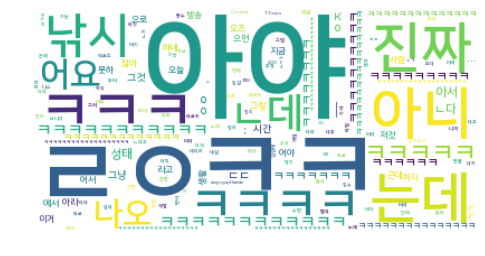

In [80]:
plt.figure(figsize=(8,8))
plt.imshow( wc_over2,  interpolation='bilinear')
plt.axis('off')
plt.show()